In [52]:
import numpy as np
from qiskit.utils import algorithm_globals
from matplotlib import pyplot as plt
from functools import partial
algorithm_globals.random_seed = 42
from sklearn.metrics import mean_squared_error



In [53]:

image_resolution = [8, 4]
values_range = image_resolution[0] * image_resolution[1]

background_range = [0, 0.1]
figure_range = [0.9, 1]

value_of_space_in_random_images = 1

In [54]:
def MyImageError(Exception):
    pass

In [55]:
def get_dot_pattern():
    return [[1]]

# Example usage
cross_pattern = get_dot_pattern()
for row in cross_pattern:
    print(row)


[1]


In [56]:
def generate_diagonal_cross_pattern(size):
    pattern = [[0] * size for _ in range(size)]  # Initialize the pattern with all 0s

    for i in range(size):
        pattern[i][i] = 1  # Set the diagonal elements to 1
        pattern[i][size - i - 1] = 1  # Set the reverse diagonal elements to 1

    return pattern

# Example usage
cross_pattern = generate_diagonal_cross_pattern(3)
for row in cross_pattern:
    print(row)


[1, 0, 1]
[0, 1, 0]
[1, 0, 1]


In [57]:
def generate_vertical_cross_pattern(size):
    pattern = []
    mid = size // 2  # Midpoint of the cross

    for i in range(size):
        row = [0] * size  # Initialize each row with 0s

        if i == mid:  # Set the horizontal line of the cross to 1
            row = [1] * size
        else:
            row[mid] = 1  # Set the vertical line of the cross to 1

        pattern.append(row)

    return pattern

# Example usage
cross_pattern = generate_vertical_cross_pattern(3)
for row in cross_pattern:
    print(row)


[0, 1, 0]
[1, 1, 1]
[0, 1, 0]


In [58]:
def generate_vertical_line_pattern(length):
    return [[1] for _ in range(length)]

# Example usage
vertical_line_pattern = generate_vertical_line_pattern(4)
vertical_line_pattern


[[1], [1], [1], [1]]

In [59]:
def generate_horizontal_line_pattern(length):    
    return [[1 for _ in range(length)]]

# Example usage
vertical_line_pattern = generate_horizontal_line_pattern(4)
vertical_line_pattern

[[1, 1, 1, 1]]

# Generating simple images

## 32 bit images

In [60]:
def get_pos(image_resolution, pattern):
    return algorithm_globals.random.integers(0, image_resolution[0] - pattern[0] + 1), \
            algorithm_globals.random.integers(0, image_resolution[1] - pattern[1]+ 1)

def get_picture(image_resolution, values_range, background_range, figure_range, pattern, pos=None):
    pattern = np.array(pattern)
    
    empty = np.array(
        [
            algorithm_globals.random.uniform(*background_range)
            for _ in range(values_range)
        ]
    ).reshape(*image_resolution)
    
    if empty.shape[0] < pattern.shape[0] + value_of_space_in_random_images \
        or empty.shape[1] < pattern.shape[1] + value_of_space_in_random_images:
        raise MyImageError("Pattern is too big for this resolution")
    kill_process = 100
    
        
    while kill_process:
        if pos is None or kill_process < 100:
            pos = get_pos(image_resolution, pattern.shape)
        kill_process -= 1    
        try:
            for i in range(pattern.shape[0]):
                for j in range(pattern.shape[1]):
                    if pattern[i][j] == 1:
                        empty[i + pos[0]][j + pos[1]] = algorithm_globals.random.uniform(*figure_range)
        except IndexError:
            print("Position is not match the pattern size")
            continue
        else:
            break
        
    empty = empty.reshape(1, -1)[0]
    
    sum_sq = np.sum(empty ** 2)
    empty = empty / np.sqrt(sum_sq)

    return empty
    

In [61]:

image_resolution = [8, 4]
values_range = image_resolution[0] * image_resolution[1]

### Cross

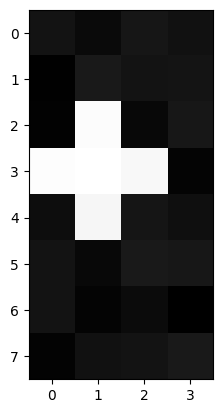

In [62]:
three_cross_pattern = generate_vertical_cross_pattern(3)
three_cross_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_cross_pattern, [2,0])
test_three_cross_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_cross_pattern, [2,0])

image = three_cross_picture_32.reshape(*image_resolution)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Diagonal Cross

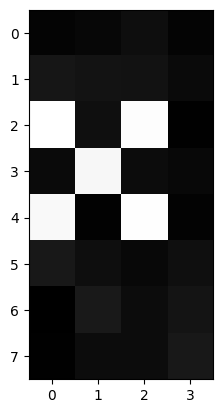

In [63]:
three_diagonal_cross_pattern = generate_diagonal_cross_pattern(3)
three_diagonal_cross_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_diagonal_cross_pattern, [2,0])
test_three_diagonal_cross_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_diagonal_cross_pattern, [2,0])

image = test_three_diagonal_cross_picture_32.reshape(*image_resolution)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Vertical Line 

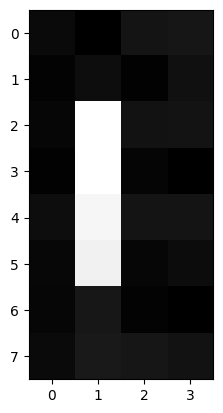

In [64]:
three_vertical_line_pattern = generate_vertical_line_pattern(4)
three_vertical_line_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_vertical_line_pattern, [2,1])
test_three_vertical_line_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_vertical_line_pattern, [2,1])

image = three_vertical_line_picture_32.reshape(*image_resolution)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Horizontal Line

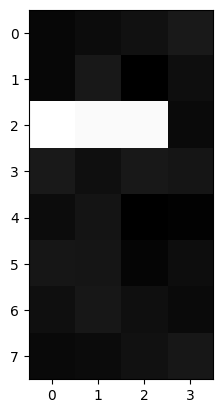

In [65]:
three_horizontal_pattern = generate_horizontal_line_pattern(3)
three_horizontal_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_horizontal_pattern, [2,0])
test_three_horizontal_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, three_horizontal_pattern, [2,0])

image = three_horizontal_picture_32.reshape(*image_resolution)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Dot

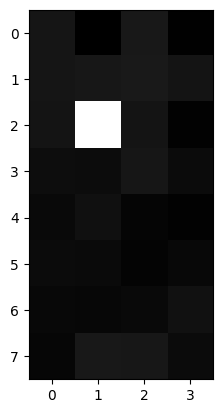

In [66]:
dot_pattern = get_dot_pattern()
dot_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, dot_pattern, [2, 1])
test_dot_picture_32 = get_picture(image_resolution, values_range, background_range, figure_range, dot_pattern, [2, 1])

image = dot_picture_32.reshape(*image_resolution)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

##  64 bit images

In [67]:
image_resolution = [8, 8]
values_range = image_resolution[0] * image_resolution[1]

In [68]:
three_cross_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_cross_pattern, np.array([2,2]))
test_three_cross_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_cross_pattern, np.array([2,2]))

three_diagonal_cross_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_diagonal_cross_pattern, np.array([2,2]))
test_three_diagonal_cross_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_diagonal_cross_pattern, np.array([2,2]))

three_vertical_line_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_vertical_line_pattern, np.array([2,2]))
test_three_vertical_line_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_vertical_line_pattern, np.array([2,2]))

three_horizontal_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_horizontal_pattern, np.array([2,2]))
test_three_horizontal_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, three_horizontal_pattern, np.array([2,2]))

dot_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, dot_pattern, np.array([3,3]))
test_dot_picture_64 = get_picture(image_resolution, values_range, background_range, figure_range, dot_pattern, np.array([3,3]))


### Example of 16 bit image

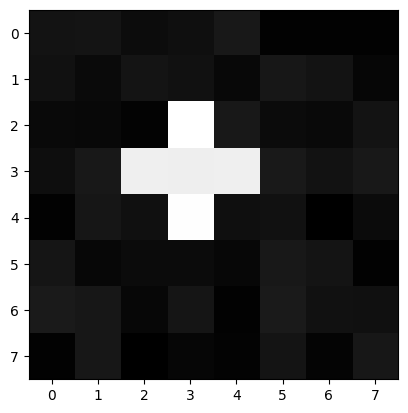

In [69]:
image = three_cross_picture_64.reshape(8, 8)
# plot the three_vertical_line_picture_16
fig = plt.figure
plt.imshow(image , cmap='gray')
plt.show()

## Generate test dataset

In [93]:
n_of_test_data = 10

image_resolution = [8, 4]
values_range = image_resolution[0] * image_resolution[1]

test_three_cross_pictures_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,0]
    )
    for _ in range(n_of_test_data)
])

test_three_diagonal_cross_pictures_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,0]
    )
    for _ in range(n_of_test_data)
])

test_three_vertical_line_pictures_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,1]
    )
    for _ in range(n_of_test_data)
])

test_three_horizontal_pictures_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,0]
    )
    for _ in range(n_of_test_data)
])

test_dot_pictures_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2, 1]
    )
    for _ in range(n_of_test_data)
])



image_resolution = [8, 8]
values_range = image_resolution[0] * image_resolution[1]

test_three_cross_pictures_64 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,0]
    )
    for _ in range(n_of_test_data)
])

test_three_diagonal_cross_pictures_64 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,0]
    )
    for _ in range(n_of_test_data)
])

test_three_vertical_line_pictures_64 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,1]
    )
    for _ in range(n_of_test_data)
])

test_three_horizontal_pictures_64 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2,0]
    )
    for _ in range(n_of_test_data)
])

test_dot_pictures_64 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
        [2, 1]
    )
    for _ in range(n_of_test_data)
])

# Generate random set of figures 8 x 4 (32)

In [71]:
image_resolution = [8, 4]
values_range = image_resolution[0] * image_resolution[1]

n_of_figures = 200

three_cross_pattern_32 = generate_vertical_cross_pattern(3)
random_set_three_cross_picture_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
    )
    for _ in range(n_of_figures)
])

three_diagonal_cross_pattern_32 = generate_diagonal_cross_pattern(3)
random_set_three_diagonal_cross_picture_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_diagonal_cross_pattern,
    )
    for _ in range(n_of_figures)
])

three_vertical_line_pattern_32 = generate_vertical_line_pattern(4)
random_set_three_vertical_line_picture_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_vertical_line_pattern,
    )
    for _ in range(n_of_figures)
])

three_horizontal_pattern_32 = generate_horizontal_line_pattern(4)
random_set_three_horizontal_picture_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_horizontal_pattern,
    )
    for _ in range(n_of_figures)
])

dot_pattern_32 = get_dot_pattern()
random_set_dot_picture_32 = np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        dot_pattern,
    )
    for _ in range(n_of_figures)
])

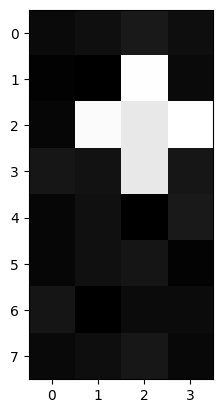

In [72]:
image = random_set_three_cross_picture_32[1].reshape(8, 4)
# plot the three_vertical_line_picture_16
fig = plt.figure
plt.imshow(image , cmap='gray')
plt.show()

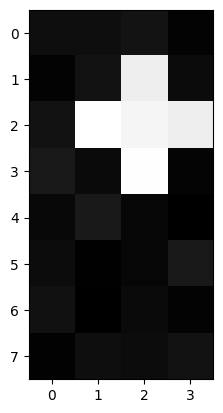

In [73]:
image = random_set_three_cross_picture_32[2].reshape(8, 4)
# plot the three_vertical_line_picture_16
fig = plt.figure
plt.imshow(image , cmap='gray')
plt.show()

# Generate random set of figures 8 x 8 (64)

In [74]:
image_resolution = [8, 8]
values_range = image_resolution[0] * image_resolution[1]

n_of_figures = 10

three_cross_pattern_64 = generate_vertical_cross_pattern(3)
random_set_three_cross_picture_64 =  np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_cross_pattern,
    )
    for _ in range(n_of_figures)
])

three_diagonal_cross_pattern_64 = generate_diagonal_cross_pattern(3)
random_set_three_diagonal_cross_picture_64 =  np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_diagonal_cross_pattern,
    )
    for _ in range(n_of_figures)
])

three_vertical_line_pattern_64 = generate_vertical_line_pattern(4)
random_set_three_vertical_line_picture_64 =  np.array([
    get_picture(
        image_resolution, 
        values_range,
        background_range,
        figure_range,
        three_vertical_line_pattern,
    )
    for _ in range(n_of_figures)
])

three_horizontal_pattern_64 = generate_horizontal_line_pattern(4)
random_set_three_horizontal_picture_64 =  np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        three_horizontal_pattern,
    )
    for _ in range(n_of_figures)
])

dot_pattern_64 = get_dot_pattern()
random_set_dot_picture_64 =  np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        dot_pattern,
    )
    for _ in range(n_of_figures)
])

In [75]:
dot_all_dots = np.concatenate((np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        dot_pattern,
        pos=[_ % 8, _ // 8]
    )
    for _ in range(64)
]),np.array([
    get_picture(
        image_resolution,
        values_range,
        background_range,
        figure_range,
        dot_pattern,
        pos=[_ % 8, _ // 8]
    )
    for _ in range(64)
])))

In [76]:
np.concatenate(([1,2], [3,4]))

array([1, 2, 3, 4])

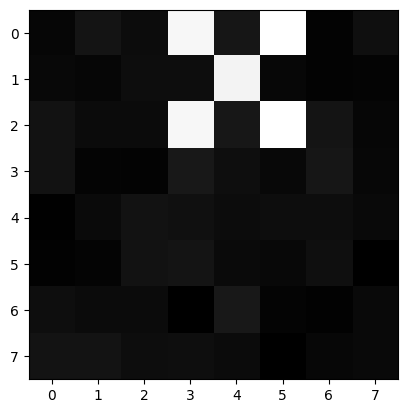

In [77]:
image = random_set_three_diagonal_cross_picture_64[2].reshape(8, 8)
# plot the three_vertical_line_picture_16
fig = plt.figure
plt.imshow(image , cmap='gray')
plt.show()


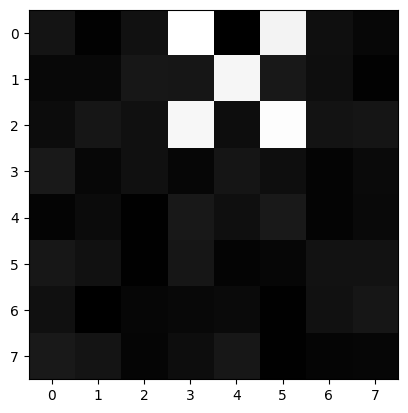

In [78]:
image = random_set_three_diagonal_cross_picture_64[8].reshape(8, 8)
# plot the three_vertical_line_picture_16
fig = plt.figure
plt.imshow(image , cmap='gray')
plt.show()

# Start of experimenting

In [79]:
import json
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN

algorithm_globals.random_seed = 42
image_resolution = [8,4]
values_range = image_resolution[0] * image_resolution[1]

## Define all required parts

In [80]:
def ansatz(num_qubits):
    return RealAmplitudes(num_qubits, reps=5)

def auto_encoder_circuit(num_latent, num_trash):
    qr = QuantumRegister(num_latent + 2 * num_trash + 1, "q")
    cr = ClassicalRegister(1, "c")
    circuit = QuantumCircuit(qr, cr)
    circuit.compose(ansatz(num_latent + num_trash), range(0, num_latent + num_trash), inplace=True)
    circuit.barrier()
    auxiliary_qubit = num_latent + 2 * num_trash
    # swap test
    circuit.h(auxiliary_qubit)
    for i in range(num_trash):
        circuit.cswap(auxiliary_qubit, num_latent + i, num_latent + num_trash + i)

    circuit.h(auxiliary_qubit)
    circuit.measure(auxiliary_qubit, cr[0])
    return circuit

def cost_func_digits(params_values, qnn, train_images):
    global objective_func_vals
    probabilities = qnn.forward(train_images, params_values)
    cost = np.sum(probabilities[:, 1]) / train_images.shape[0]

    # plotting part
    clear_output(wait=True)
    objective_func_vals.append(cost)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

    return cost

def identity_interpret(x):
    return x

In [81]:
def validate_quantum_autoencoder(num_trash, num_latent, validate_set, fm, opt_result, return_output=True):
    global image_resolution
    test_qc_in_function = QuantumCircuit(num_latent + num_trash)
    test_qc_in_function = test_qc_in_function.compose(fm)
    ansatz_qc = ansatz(num_latent + num_trash)
    test_qc_in_function = test_qc_in_function.compose(ansatz_qc)
    test_qc_in_function.barrier()
    for i in list(reversed(range(num_latent + num_trash)))[:num_trash]:
        test_qc_in_function.reset(i)
    test_qc_in_function.barrier()
    test_qc_in_function = test_qc_in_function.compose(ansatz_qc.inverse())

    result_image = []
    for image in validate_set:
        original_qc = fm.assign_parameters(image)
        original_sv = Statevector(original_qc).data
        original_sv = np.reshape(np.abs(original_sv) ** 2, image_resolution)

        param_values = np.concatenate((image, opt_result.x))
        output_qc = test_qc_in_function.assign_parameters(param_values)
        output_sv = Statevector(output_qc).data
        result_image += [np.real(output_sv)]
        
        output_sv = np.reshape(np.abs(output_sv) ** 2, image_resolution)
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(original_sv)
        ax1.set_title("Input Data")
        ax2.imshow(output_sv)
        ax2.set_title("Output Data")
        plt.show()

    return result_image if return_output else (test_qc_in_function, ) 

In [82]:
num_latent = 4
num_trash = 2

### Quantum circuits for 32 and 64

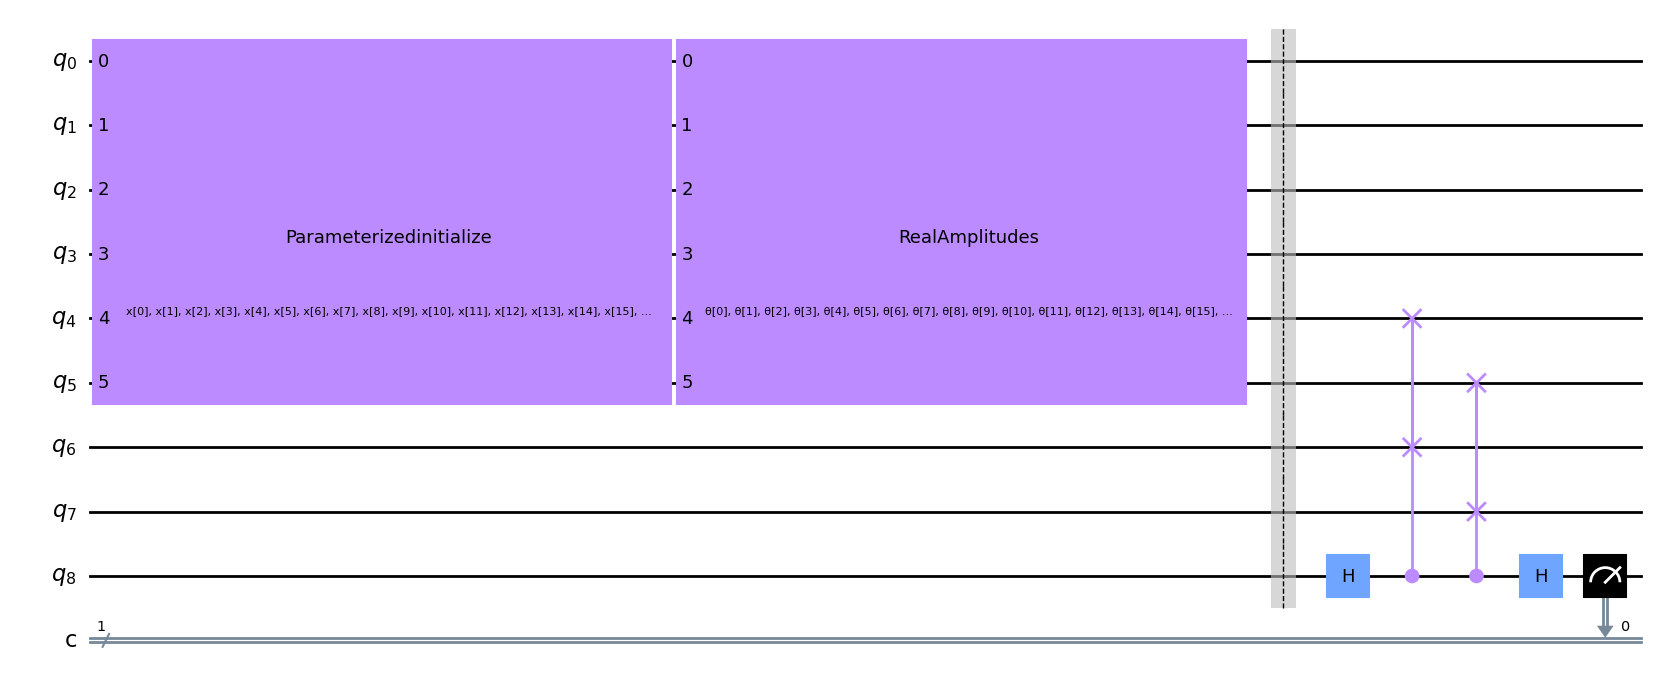

In [83]:
def get_quantum_cir(num_latent, num_trash):
    fm = RawFeatureVector(2 ** (num_latent + num_trash))

    ae = auto_encoder_circuit(num_latent, num_trash)

    qc = QuantumCircuit(num_latent + 2 * num_trash + 1, 1)

    qc = qc.compose(fm, range(num_latent + num_trash))
    qc = qc.compose(ae)

    # transpiled = transpile(qc, backend=backend)

    qc.draw("mpl")
    
    return fm, ae, qc

num_latent = 4
num_trash = 2
fm_64, ae_64, qc_64 = get_quantum_cir(num_latent, num_trash)

qc_64.draw("mpl")

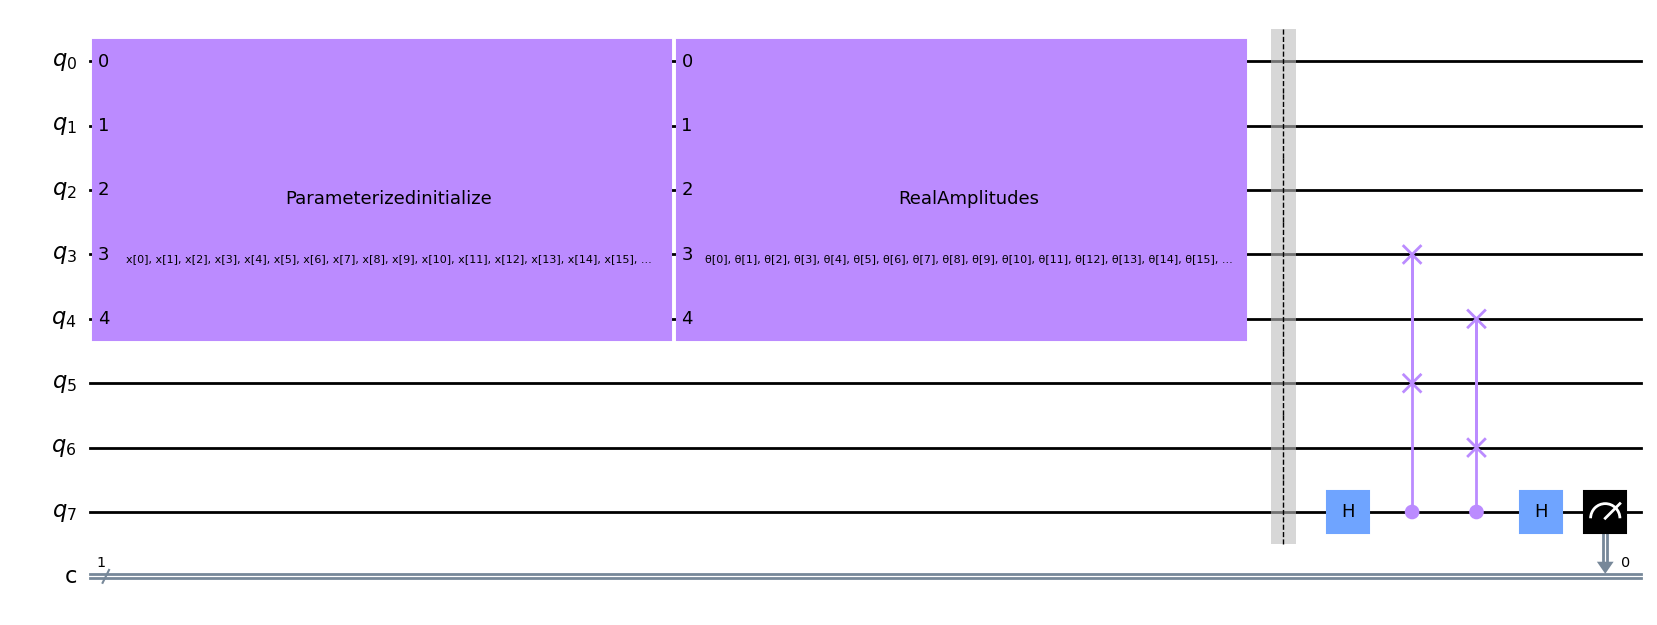

In [84]:
num_latent = 3
num_trash = 2
fm_32, ae_32, qc_32 = get_quantum_cir(num_latent, num_trash)

qc_32.draw("mpl")

### Quantum circuits for 32 with more trash and 64 with less trash qubits 

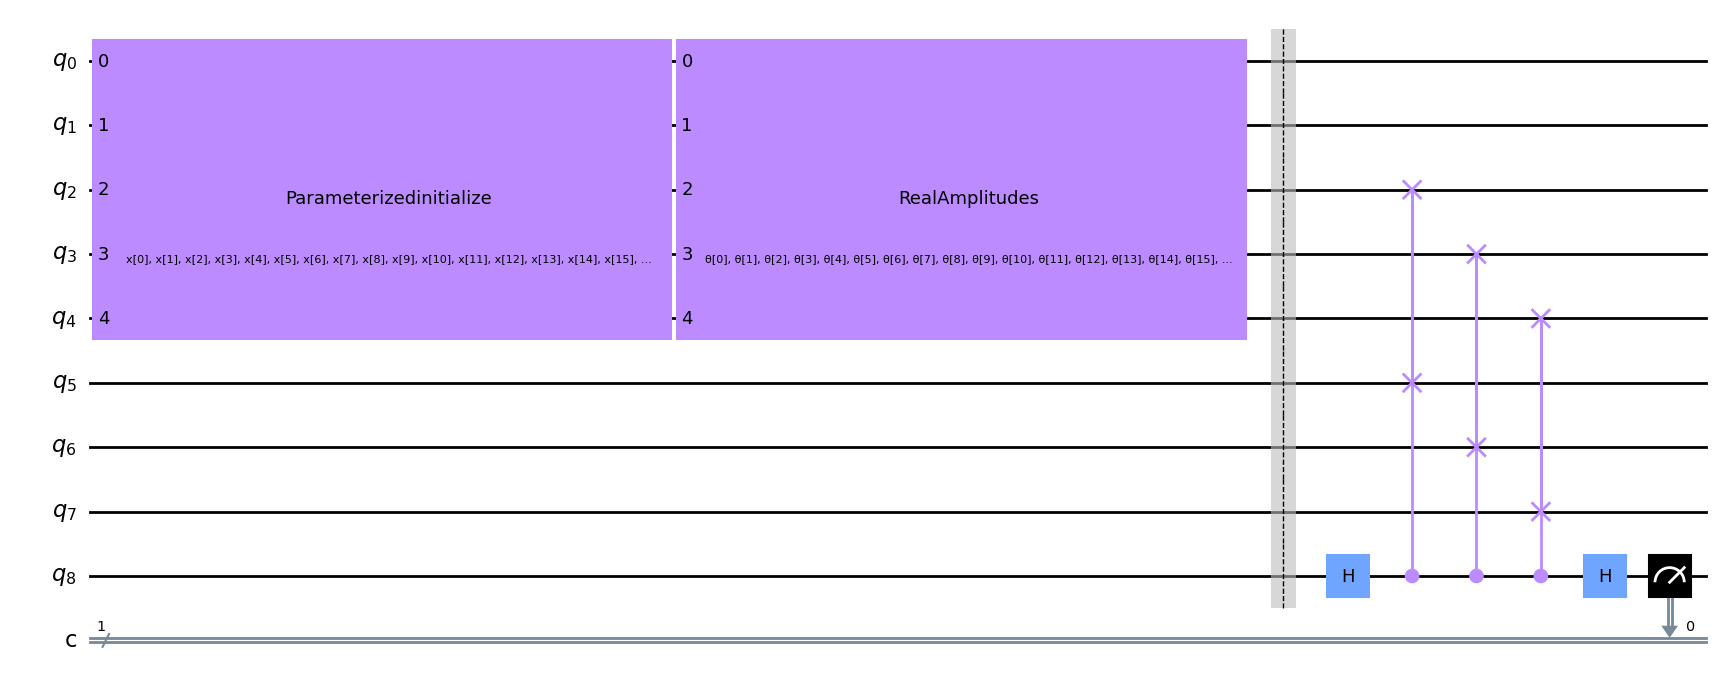

In [85]:
num_latent = 2
num_trash = 3
fm_32_2_3, ae_32_2_3, qc_32_2_3 = get_quantum_cir(num_latent, num_trash)

qc_32_2_3.draw("mpl")

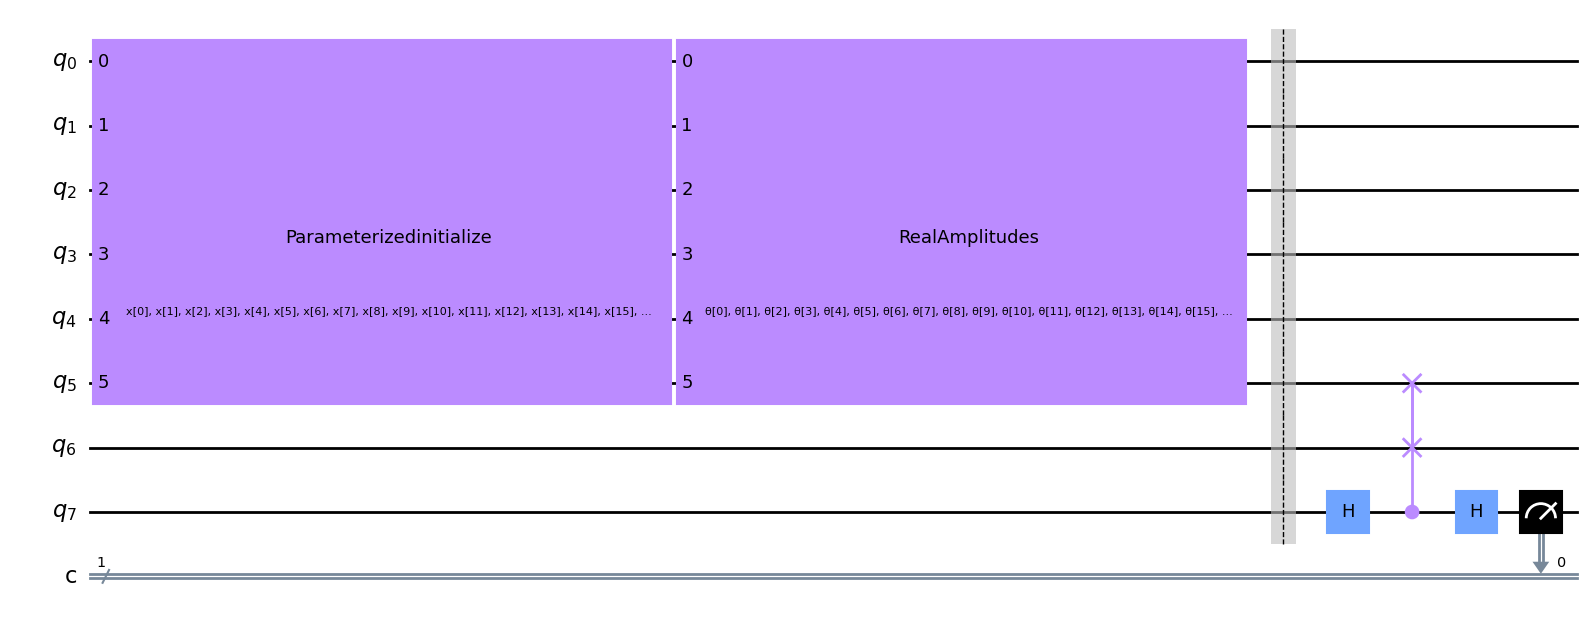

In [86]:
num_latent = 5
num_trash = 1
fm_64_5_1, ae_64_5_1, qc_64_5_1 = get_quantum_cir(num_latent, num_trash)

qc_64_5_1.draw("mpl")

### Create SimpleQNN

In [87]:
qnn_64 = SamplerQNN(
    circuit=qc_64,
    input_params=fm_64.parameters,
    weight_params=ae_64.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

qnn_32 = SamplerQNN(
    circuit=qc_32,
    input_params=fm_32.parameters,
    weight_params=ae_32.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

qnn_32_2_3= SamplerQNN(
    circuit=qc_32_2_3,
    input_params=fm_32_2_3.parameters,
    weight_params=ae_32_2_3.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

qnn_64_5_1 = SamplerQNN(
    circuit=qc_64_5_1,
    input_params=fm_64_5_1.parameters,
    weight_params=ae_64_5_1.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

### Set initial points  

In [88]:
algorithm_globals.random_seed = 42
initial_point_64 = algorithm_globals.random.random(ae_64.num_parameters)
initial_point_32 = algorithm_globals.random.random(ae_32.num_parameters)

## Test on all shapes with 32 resolution

In [89]:
image_resolution = [8, 4]
values_range = image_resolution[0] * image_resolution[1]

num_latent = 3
num_trash = 2

### Horizontal line 

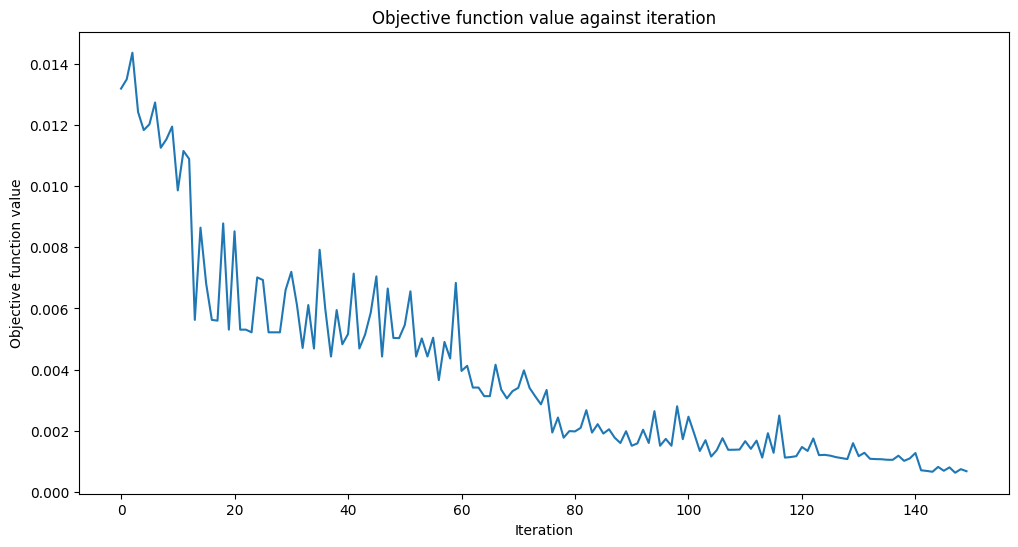

Fit in 15.06 seconds


In [90]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_horizontal_picture_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=three_horizontal_picture_32), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

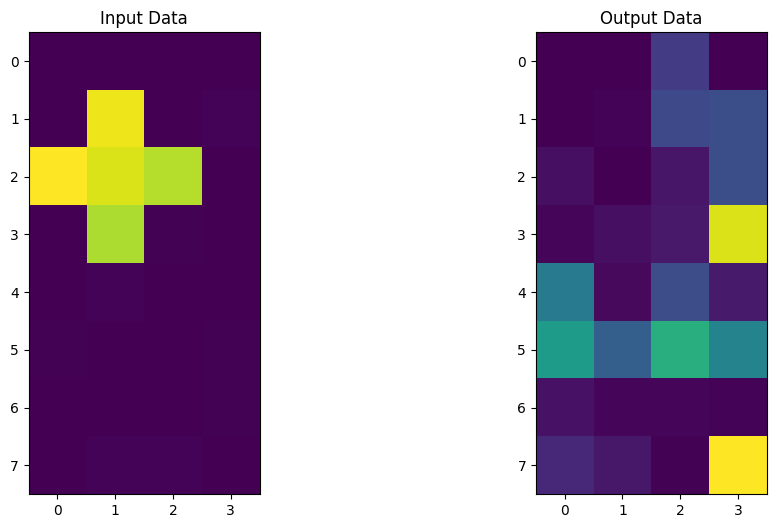

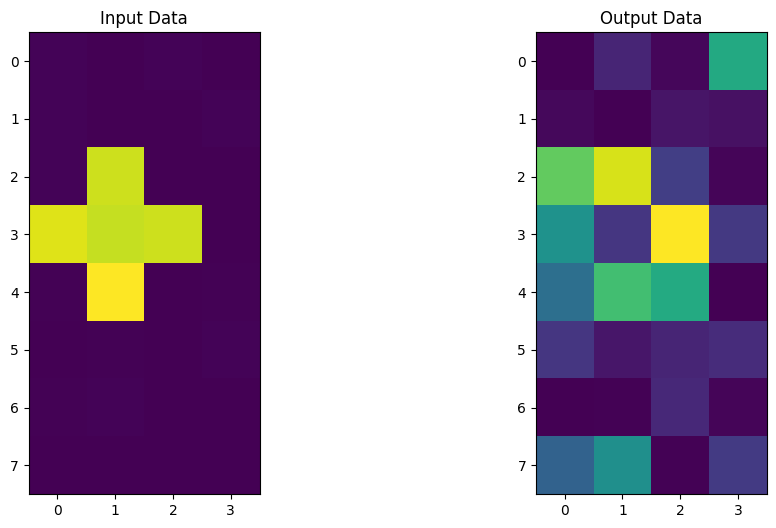

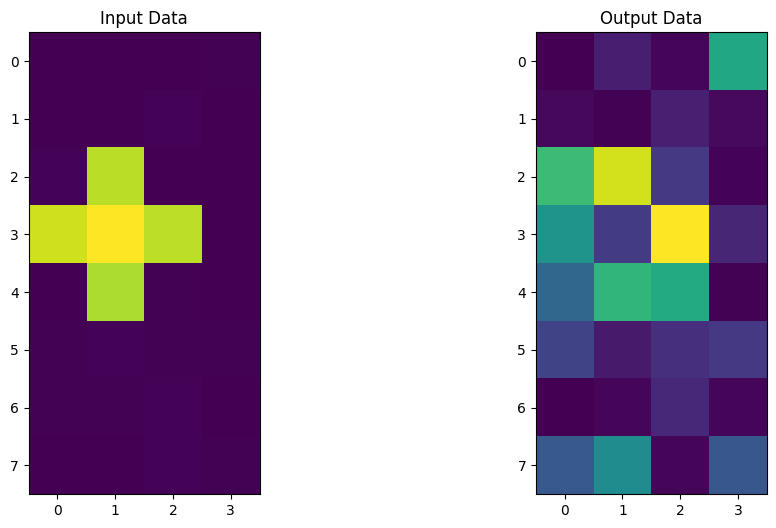

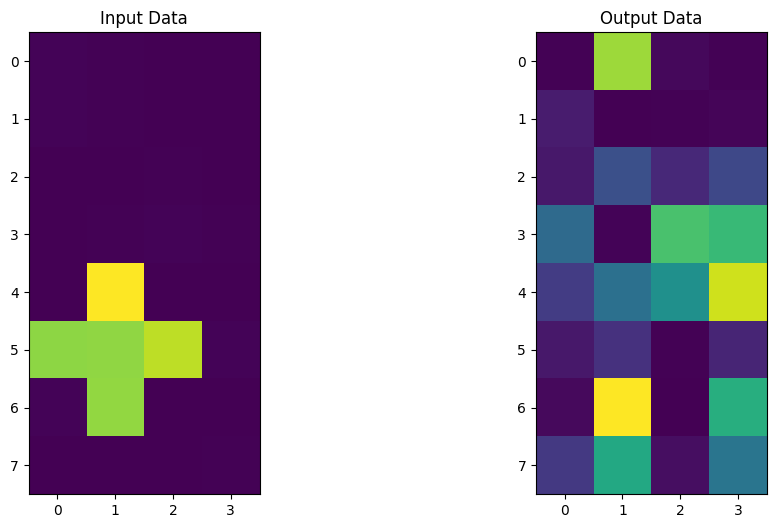

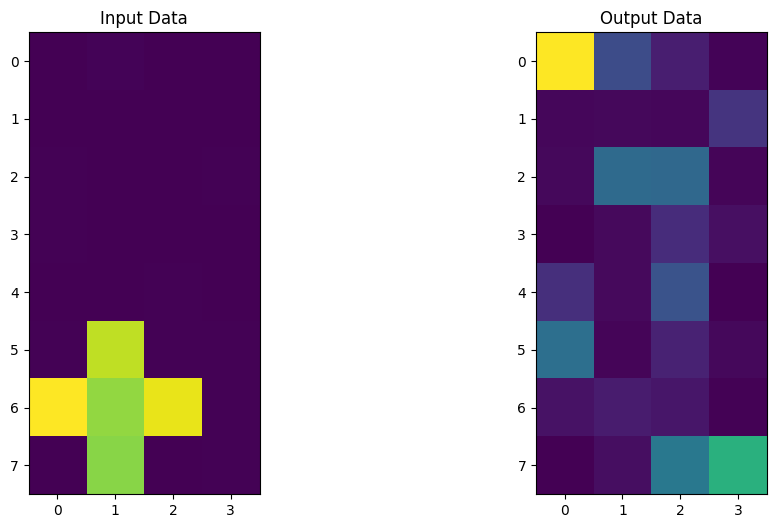

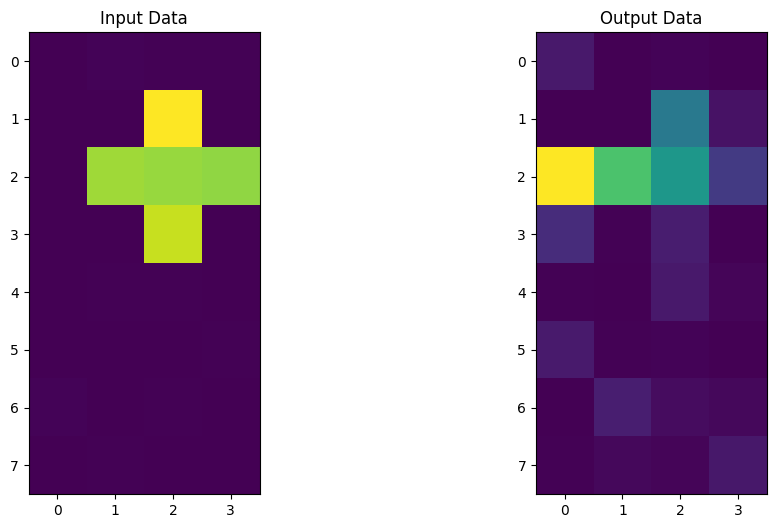

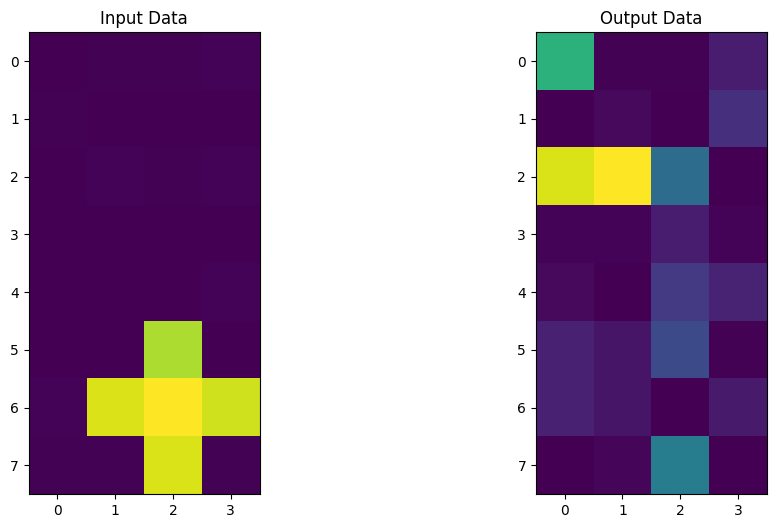

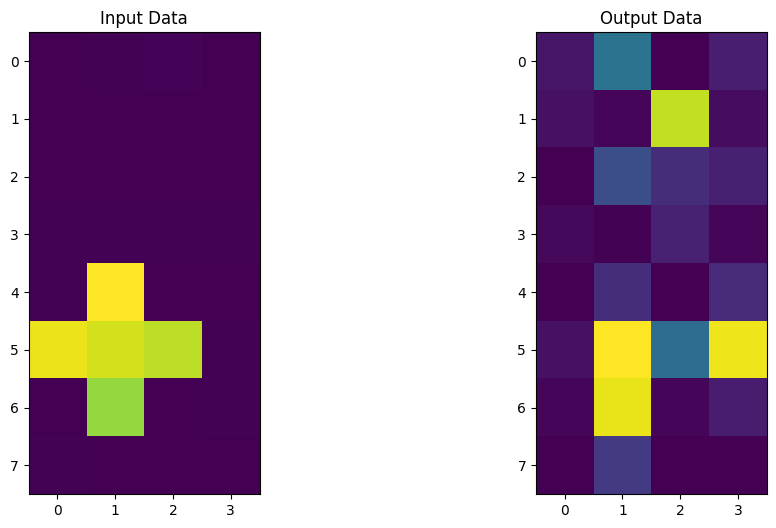

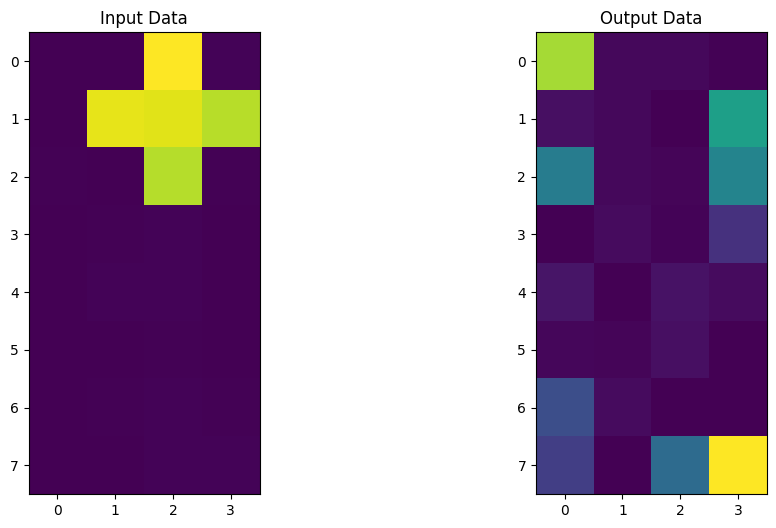

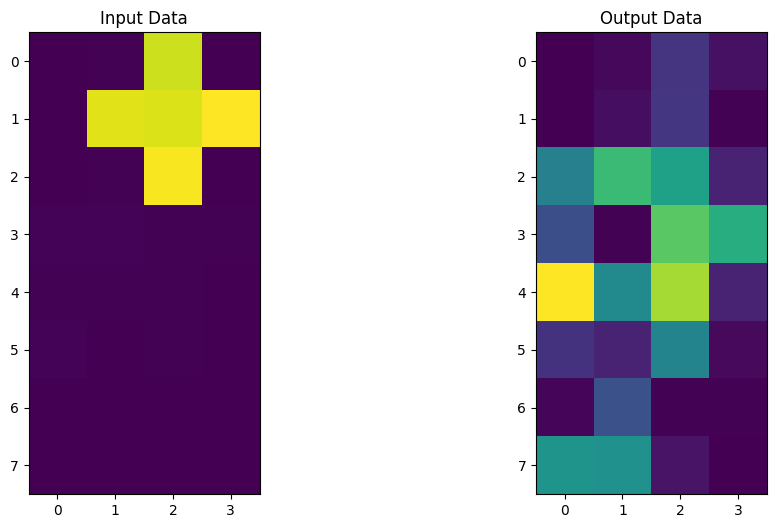

In [92]:
# Test
output_images = validate_quantum_autoencoder(
    num_trash, num_latent, test_three_horizontal_pictures_32, fm_32, opt_result_three_horizontal_picture_32)

# predicted = output_images[0]
# actual = test_dot_picture_64

# mse = mean_squared_error(actual, predicted)
# print("MSE:", mse)

### Cross

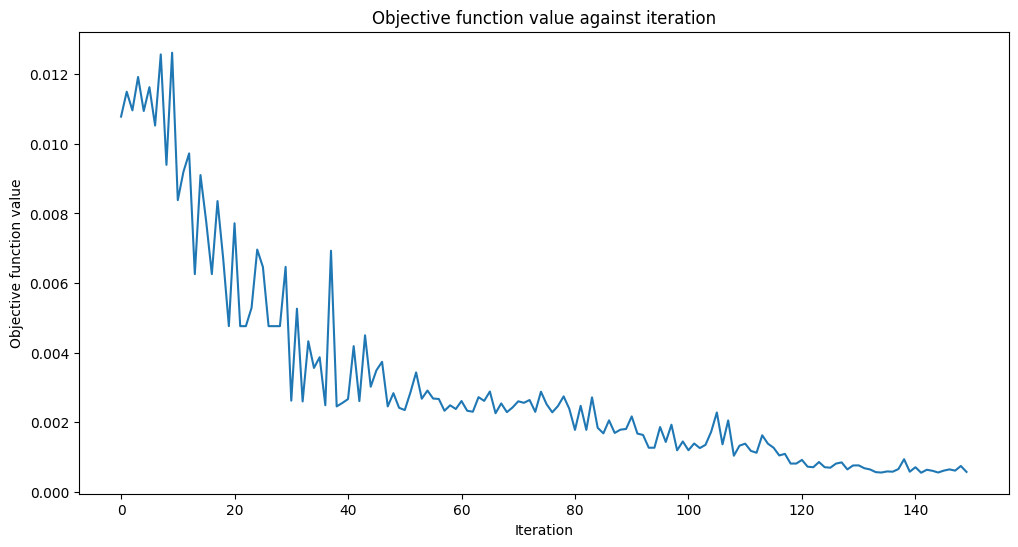

Fit in 14.32 seconds


In [38]:
# three_cross_picture_32
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_cross_picture_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=three_cross_picture_32), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

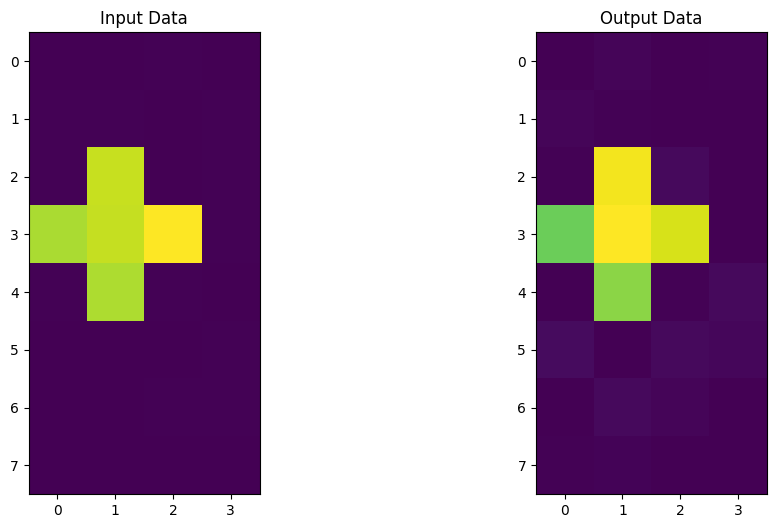

In [39]:
# Test

validate_quantum_autoencoder(
    num_trash, num_latent, [test_three_cross_picture_32], fm_32, opt_result_three_cross_picture_32)

### Diagonal Cross

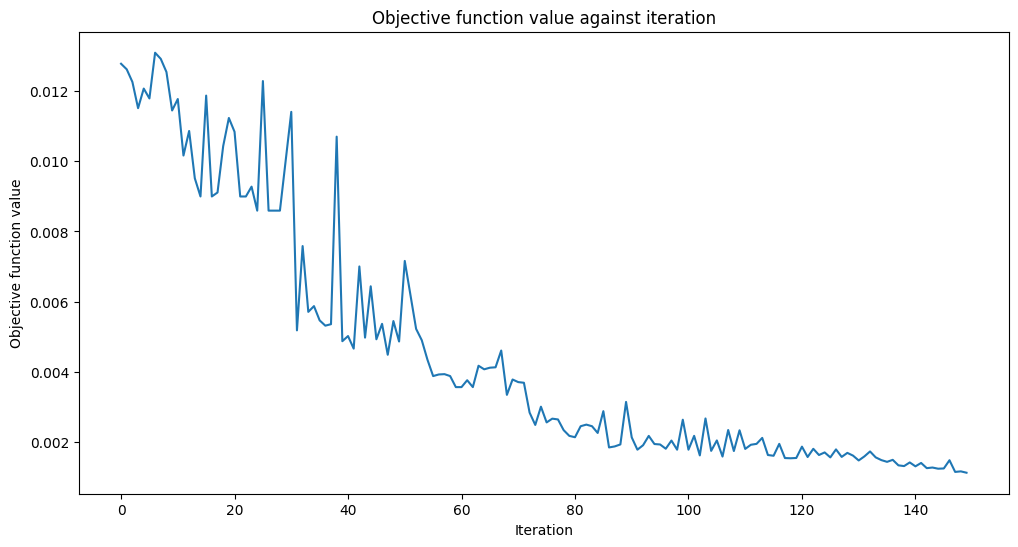

Fit in 14.09 seconds


In [40]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_diagonal_cross_picture_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=three_diagonal_cross_picture_32), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

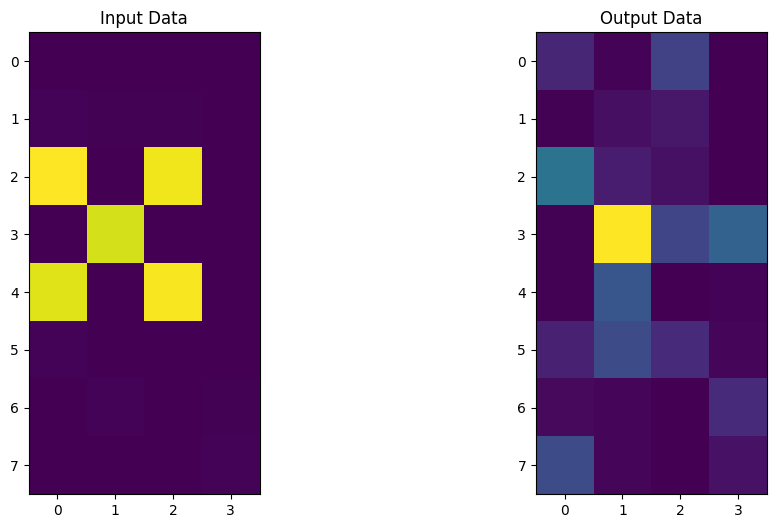

In [41]:


validate_quantum_autoencoder(
    num_trash, num_latent, [test_three_diagonal_cross_picture_32], fm_32, opt_result_three_diagonal_cross_picture_32)


### Vertical Line

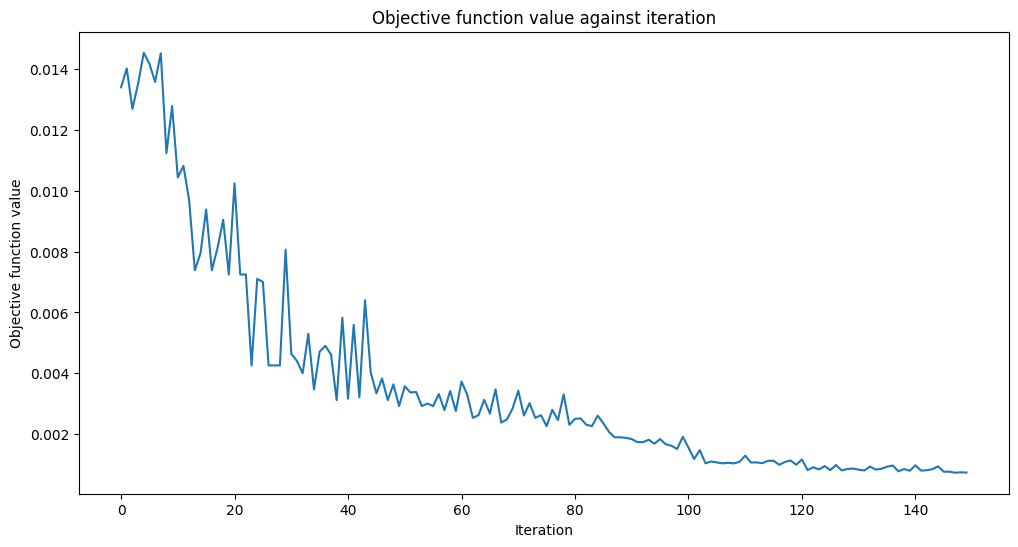

Fit in 14.00 seconds


In [42]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_vertical_line_picture_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=three_vertical_line_picture_32), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

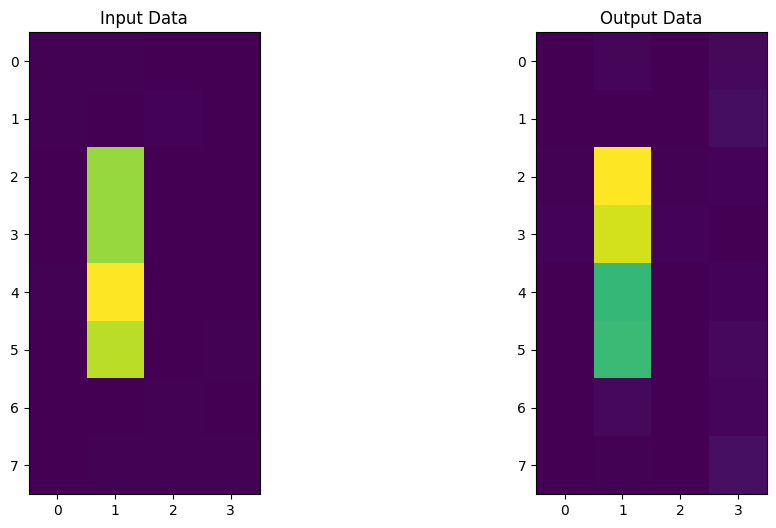

In [43]:


validate_quantum_autoencoder(
    num_trash, num_latent, [test_three_vertical_line_picture_32], fm_32, opt_result_three_vertical_line_picture_32)

### Dot

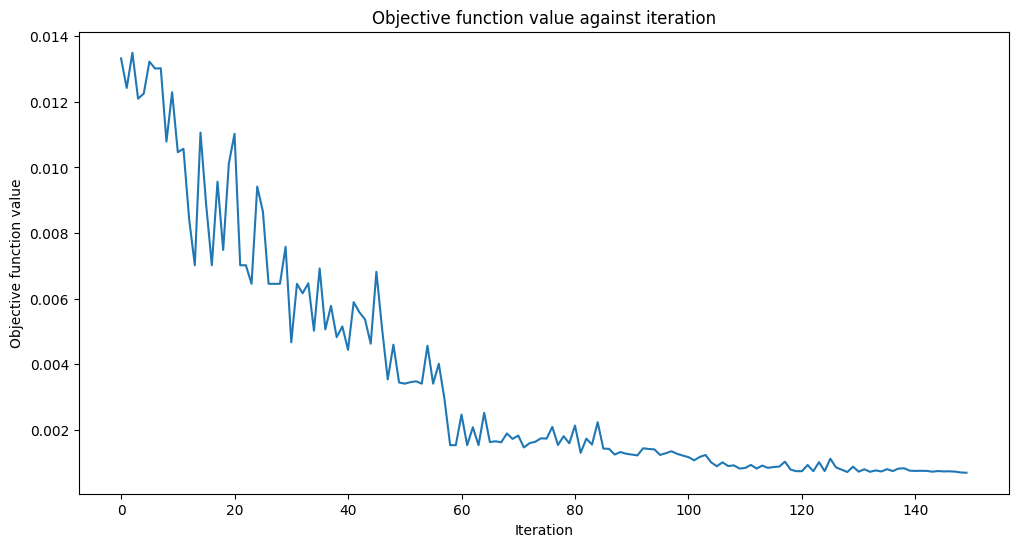

Fit in 13.98 seconds


In [44]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_dot_picture_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=dot_picture_32), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

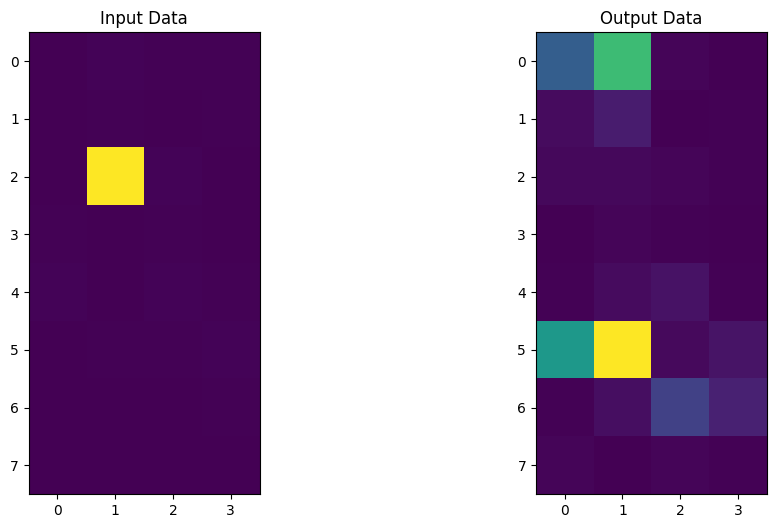

In [45]:
validate_quantum_autoencoder(
    num_trash, num_latent, [test_dot_picture_32], fm_32, opt_result_dot_picture_32)


## Tool for many figures at once

In [101]:
image_resolution = [8, 4]
values_range = image_resolution[0] * image_resolution[1]

num_latent = 3
num_trash = 2


In [46]:
def get_figures_set(cross=0, diagonal_cross=0, vertical_line=0, horizontal=0, dot=0):
    result_set = []
    if cross:
        result_set += [three_cross_picture_32]
    if diagonal_cross:
        result_set += [three_diagonal_cross_picture_32]
        
    if vertical_line:
        result_set += [three_vertical_line_picture_32]
    if horizontal :
        result_set += [three_horizontal_picture_32]
    if dot:
        result_set += [dot_picture_32]
        
    return np.array(result_set)

def get_random_set(cross=0, diagonal_cross=0, vertical_line=0, horizontal=0, dot=0):
    result_set = []
    if cross:
        result_set += [three_cross_picture_32]
    if diagonal_cross:
        result_set += [three_diagonal_cross_picture_32]
        
    if vertical_line:
        result_set += [three_vertical_line_picture_32]
    if horizontal :
        result_set += [three_horizontal_picture_32]
    if dot:
        result_set += [dot_picture_32]
        
    return np.array(result_set)

def get_test_figures_set(cross=0, diagonal_cross=0, vertical_line=0, horizontal=0, dot=0):
    result_set = []
    if cross:
        result_set += [test_three_cross_picture_32]
    if diagonal_cross:
        result_set += [test_three_diagonal_cross_picture_32]
        
    if vertical_line:
        result_set += [test_three_vertical_line_picture_32]
    if horizontal :
        result_set += [test_three_horizontal_picture_32]
    if dot:
        result_set += [test_dot_picture_32]
        
    return np.array(result_set)


### All Figures

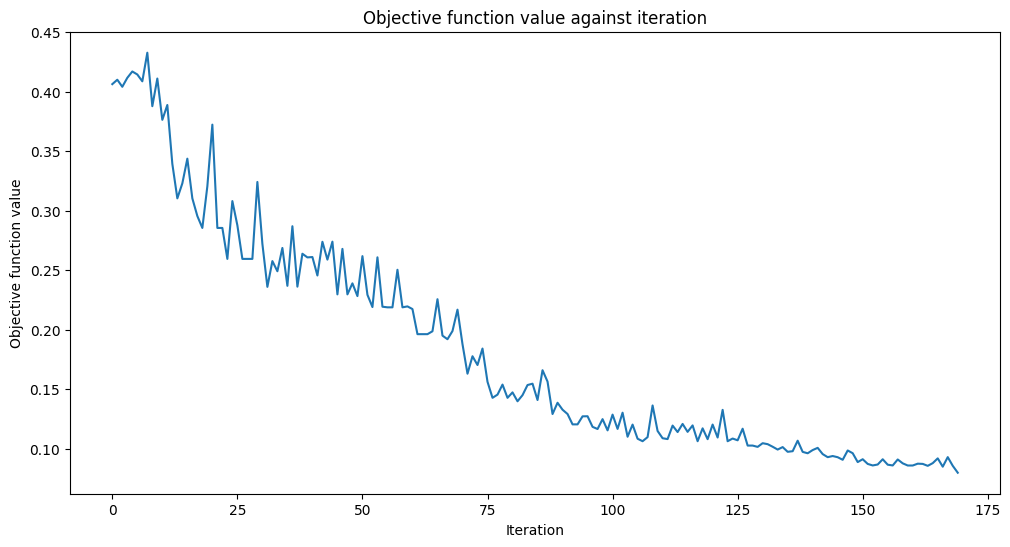

Fit in 18.96 seconds


In [47]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=170)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_all_figures_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=get_figures_set(
            cross=1, diagonal_cross=1, vertical_line=1, horizontal=1, dot=1
            )), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

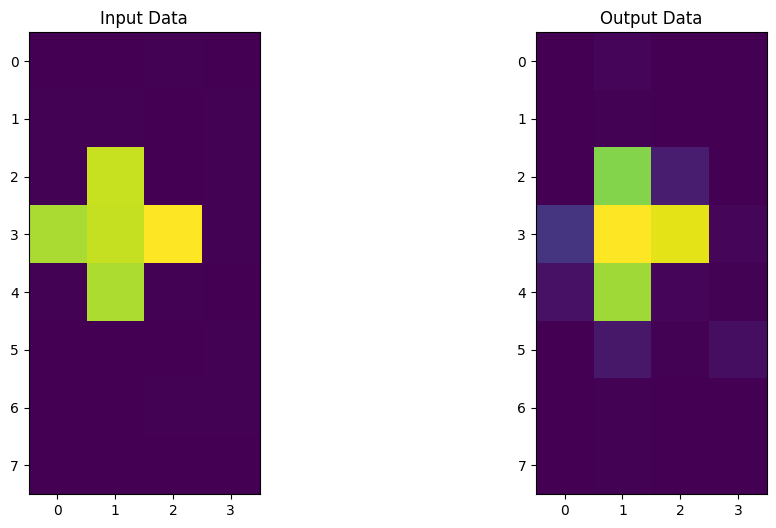

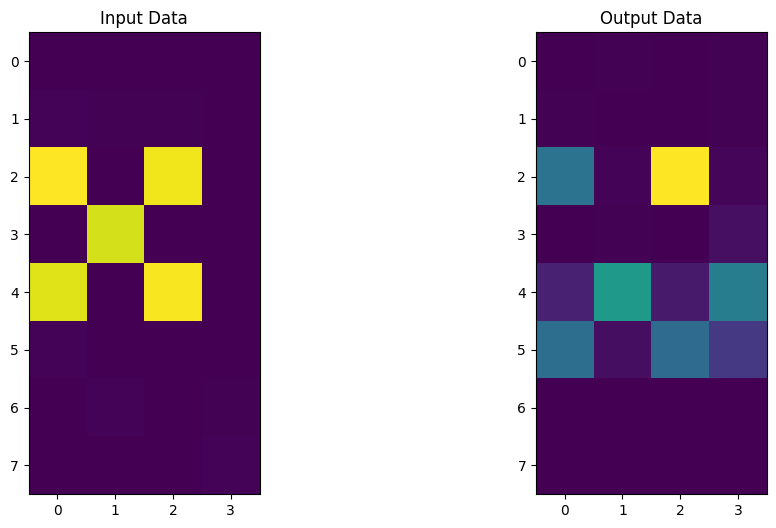

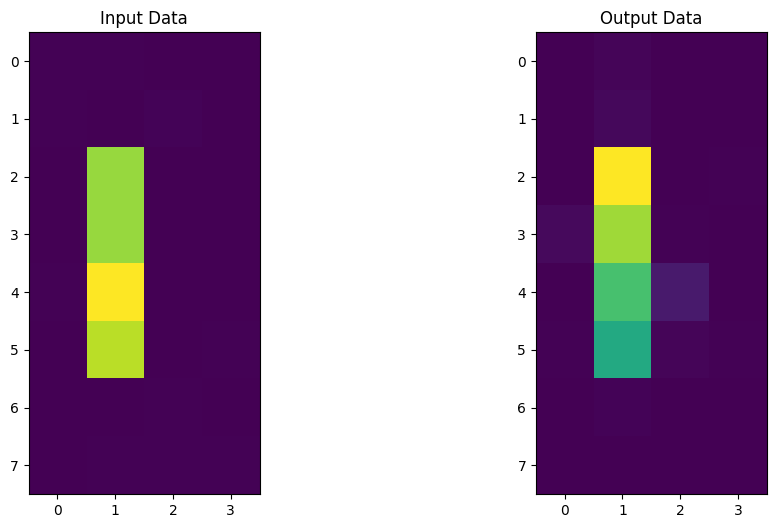

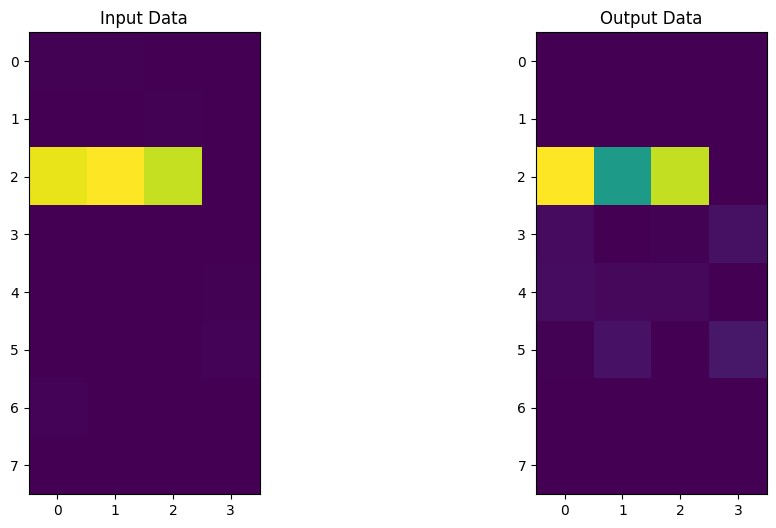

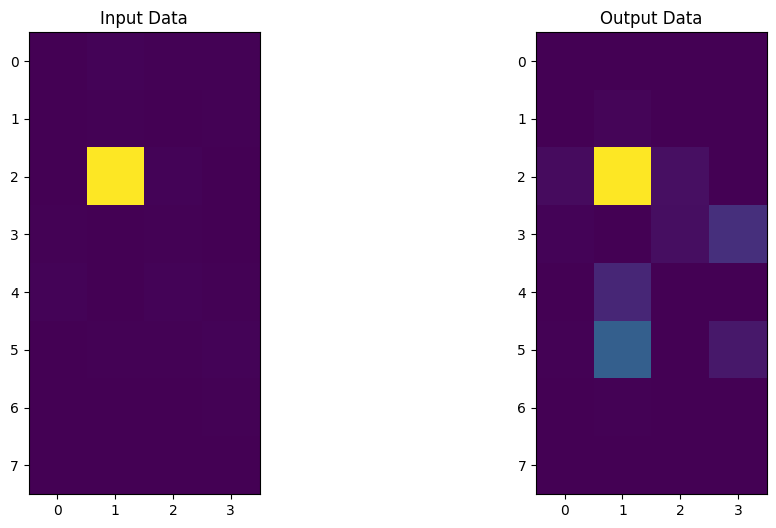

In [48]:
validate_quantum_autoencoder(
    num_trash, num_latent, get_test_figures_set(
            cross=1, diagonal_cross=1, vertical_line=1, horizontal=1, dot=1
            ), fm_32, opt_result_all_figures_32)


### Cross and Diagonal Cross

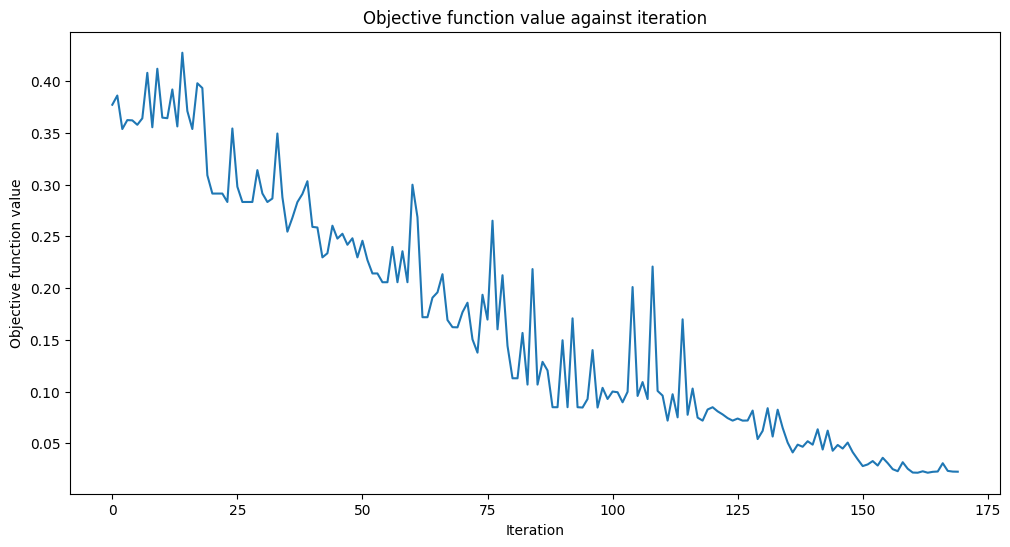

Fit in 17.08 seconds


In [49]:
# opt_result_three_horizontal_picture

objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_crosses_picture_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=get_figures_set(
            cross=1, diagonal_cross=1
            )), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

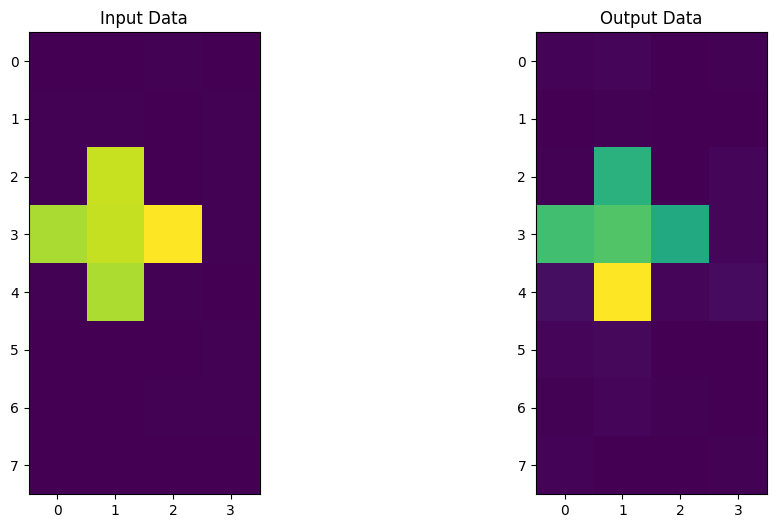

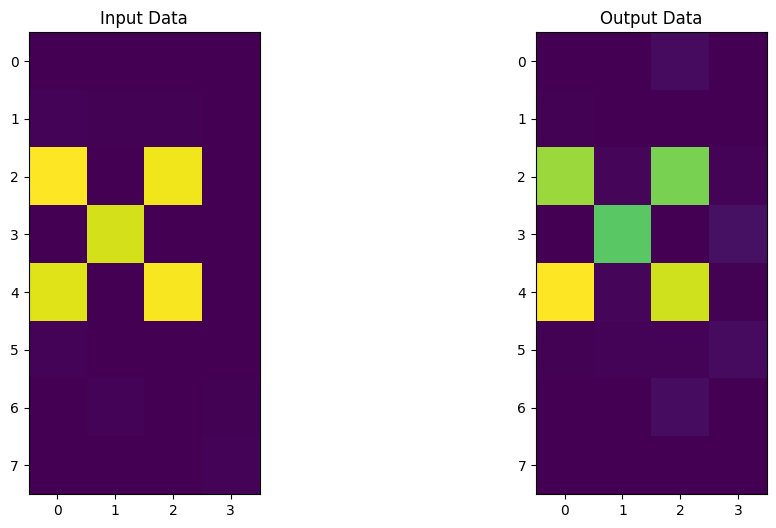

In [50]:
validate_quantum_autoencoder(
    num_trash, num_latent, get_test_figures_set(
            cross=1, diagonal_cross=1
            ), fm_32, opt_result_crosses_picture_32)


### Only Horizontal and Vertical Line

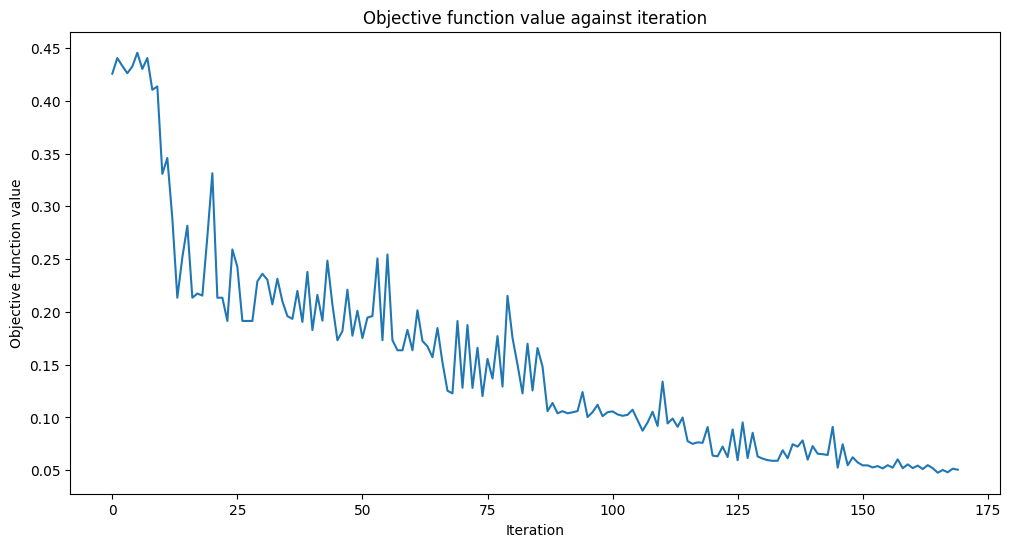

Fit in 17.41 seconds


In [51]:
# opt_result_three_horizontal_picture

objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_two_lines_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=get_figures_set(
            vertical_line=1, horizontal=1
            )), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

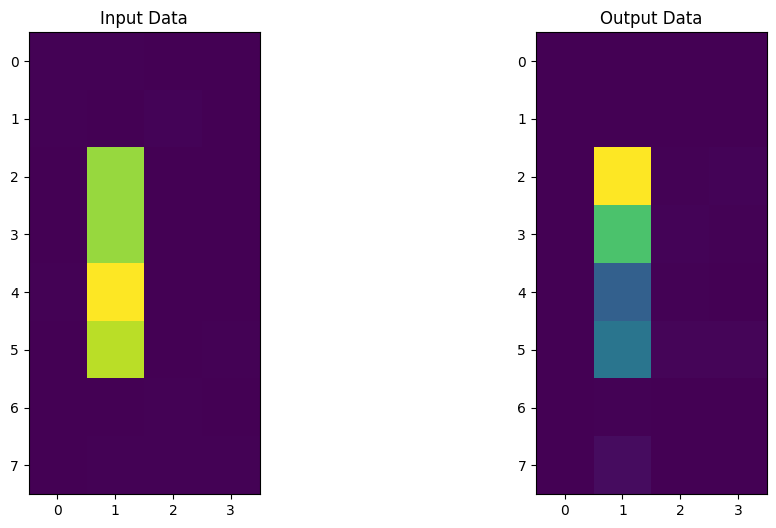

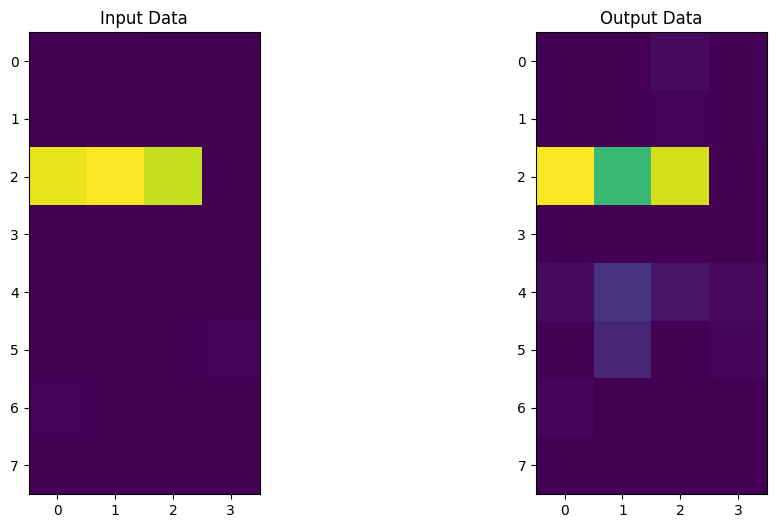

In [52]:
validate_quantum_autoencoder(
    num_trash, num_latent, get_test_figures_set(
            vertical_line=1, horizontal=1
            ), fm_32, opt_result_two_lines_32)

### Only Horizontal Line and Cross

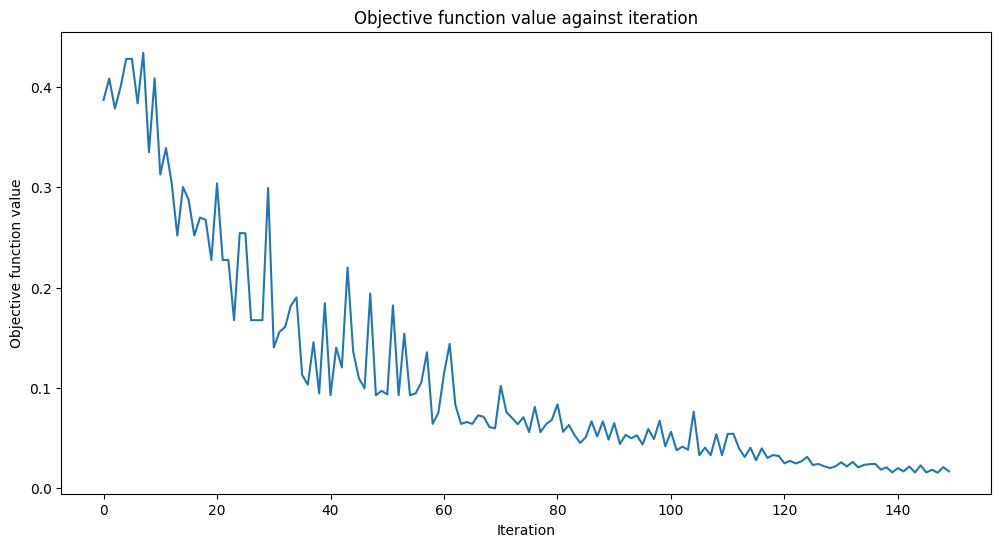

Fit in 15.16 seconds


In [53]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_horizontal_line_cross_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=get_figures_set(
            vertical_line=1, cross=1
            )), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

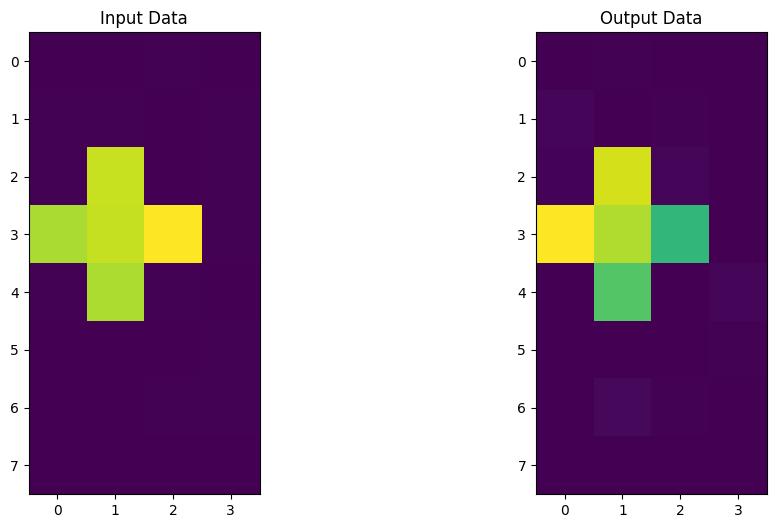

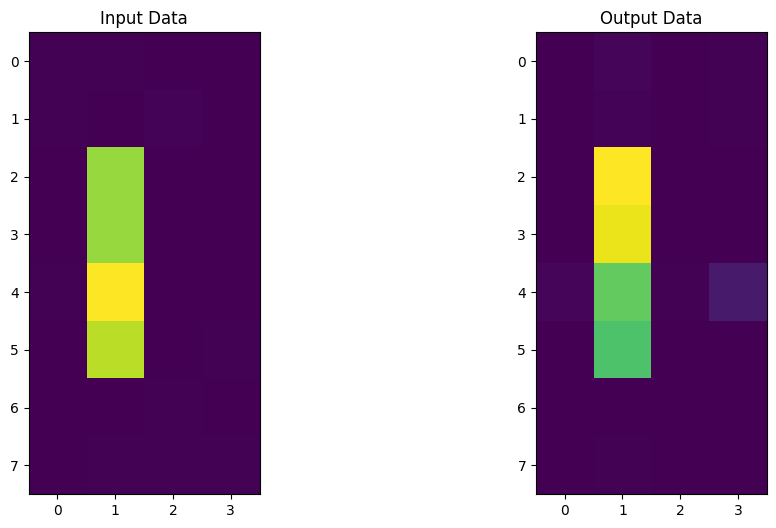

In [54]:
validate_quantum_autoencoder(
    num_trash, num_latent, get_test_figures_set(
            vertical_line=1, cross=1
            ), fm_32, opt_result_horizontal_line_cross_32)

### Only Dot and Diagonal Cross

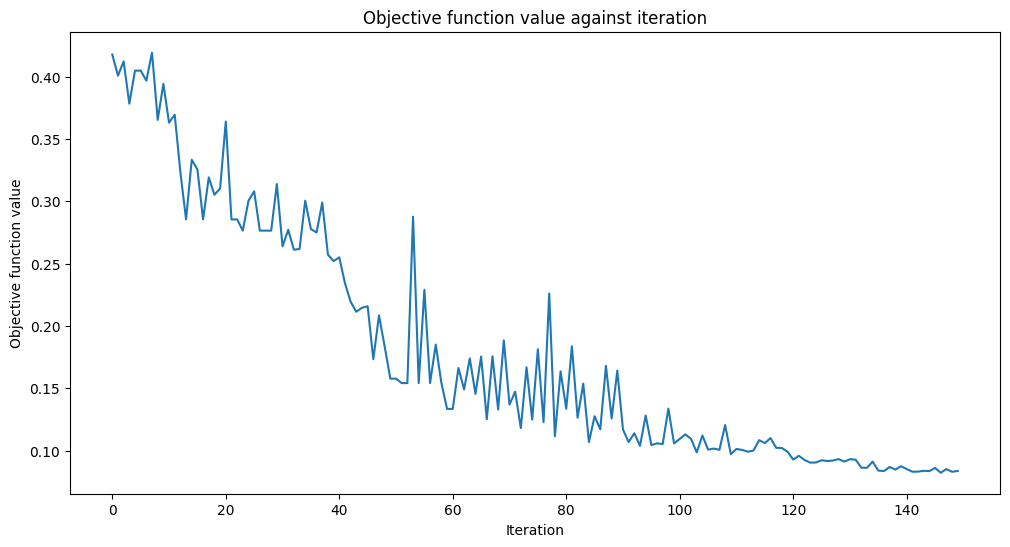

Fit in 15.06 seconds


In [97]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_dot_and_diagonal_cross_32 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_32,
        train_images=get_figures_set(
            diagonal_cross=1, dot=1
            )), x0=initial_point_32)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

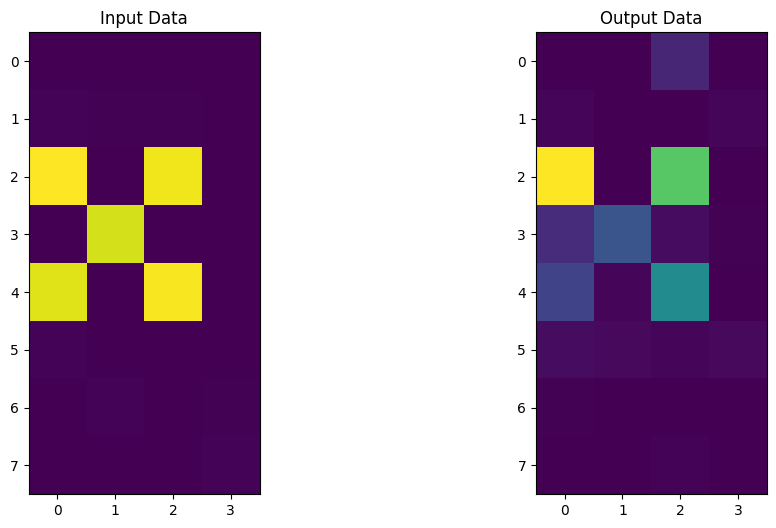

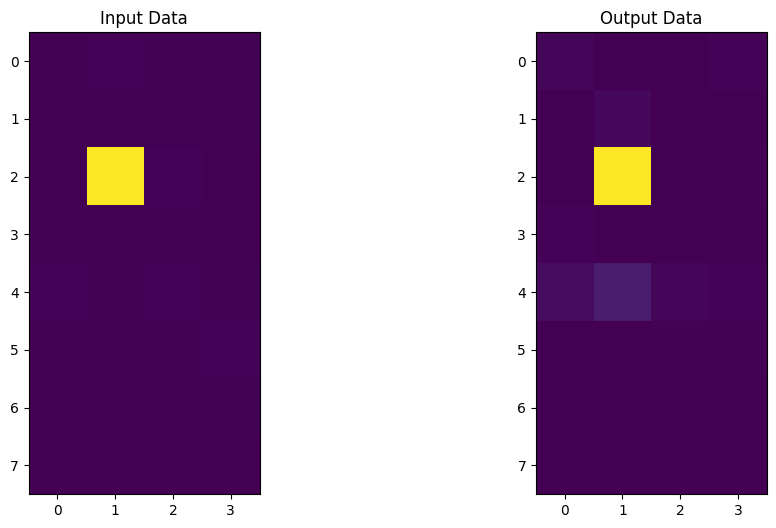

In [102]:
validate_quantum_autoencoder(
    2, 3, get_test_figures_set(
            diagonal_cross=1, dot=1
            ), fm_32, opt_result_dot_and_diagonal_cross_32)

## Test on all shapes with 64 resolution

### Horizontal line 

In [39]:
image_resolution = [8, 8]
values_range = image_resolution[0] * image_resolution[1]

num_latent = 4
num_trash = 2


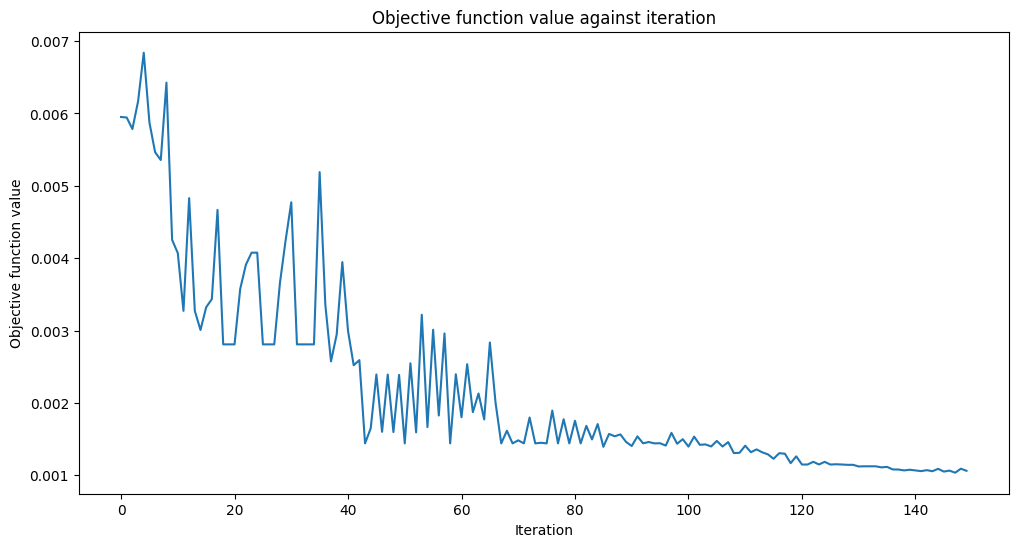

Fit in 20.88 seconds


In [58]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_horizontal_picture_64 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_64,
        train_images=three_horizontal_picture_64), x0=initial_point_64)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

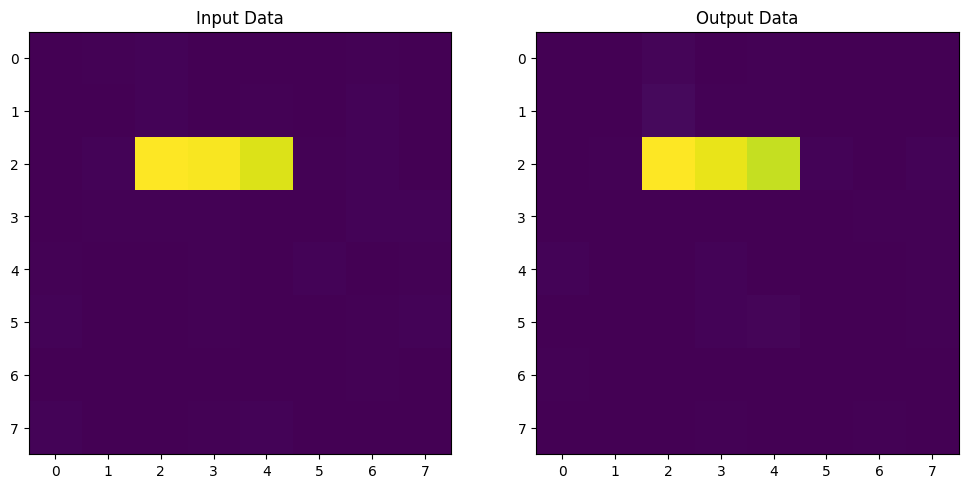

In [85]:
validate_quantum_autoencoder(
    num_trash, num_latent, [test_three_horizontal_picture_64],
    fm_64, opt_result_three_horizontal_picture_64)


### Cross

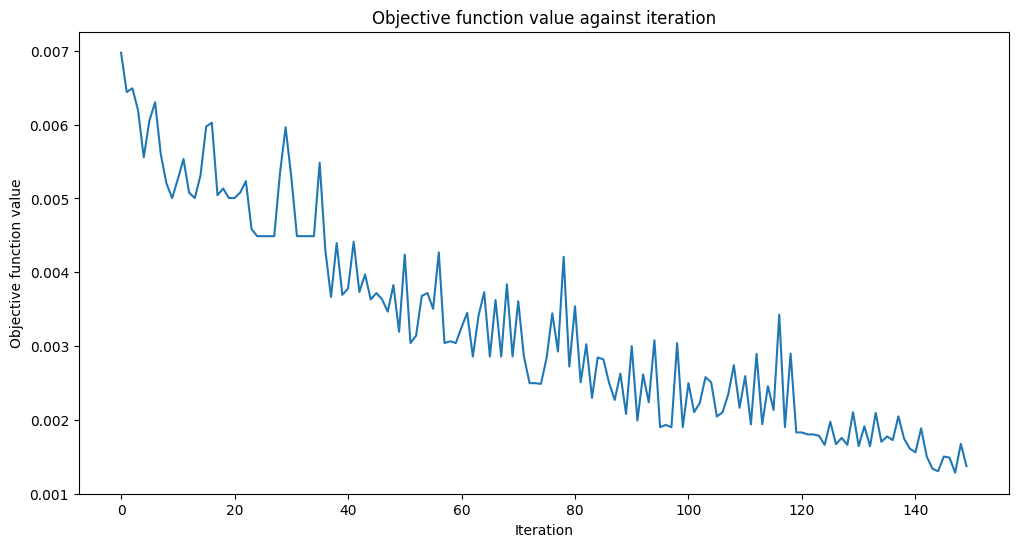

Fit in 22.02 seconds


In [60]:
# three_cross_picture_64
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_cross_picture_64 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_64,
        train_images=three_cross_picture_64), x0=initial_point_64)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

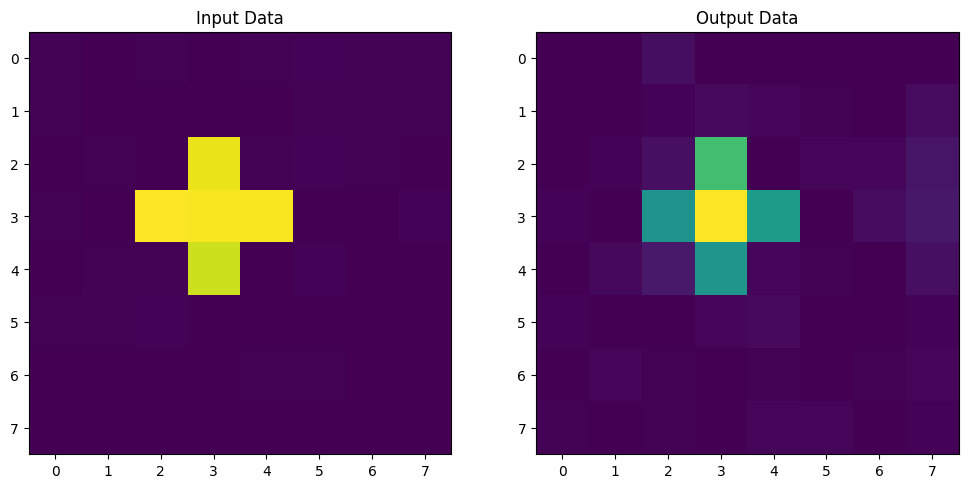

In [61]:
validate_quantum_autoencoder(
    num_trash, num_latent, [test_three_cross_picture_64],
    fm_64, opt_result_three_cross_picture_64)

### Diagonal Cross

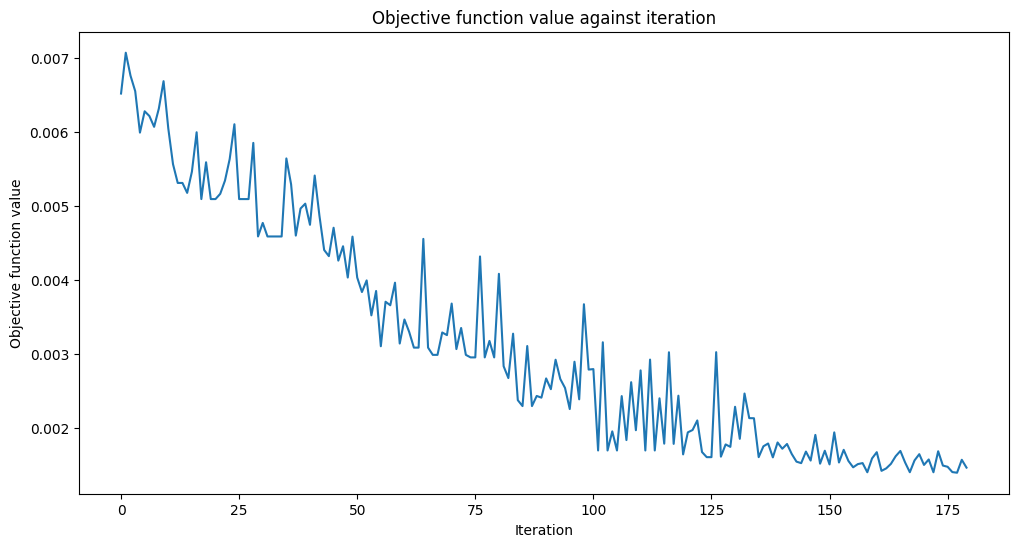

Fit in 26.46 seconds


In [62]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=180)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_diagonal_cross_picture_64 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_64,
        train_images=three_diagonal_cross_picture_64), x0=initial_point_64)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

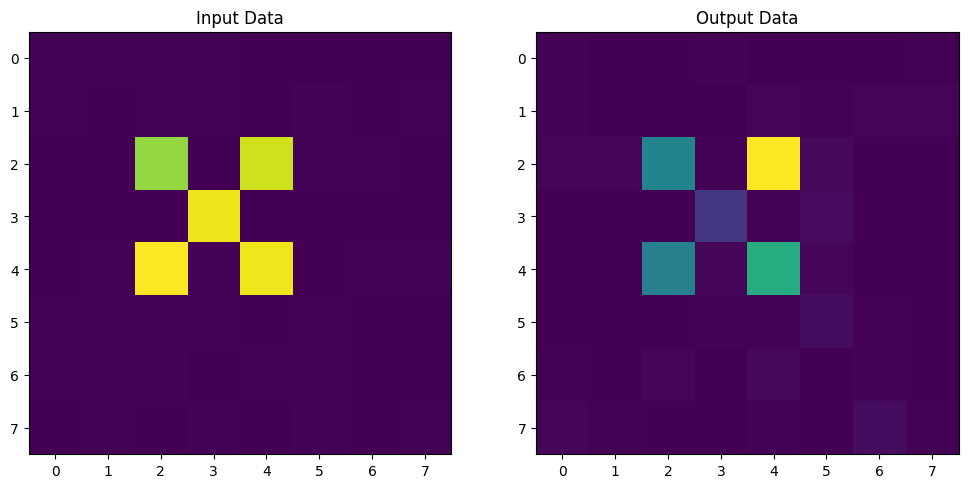

In [63]:
validate_quantum_autoencoder(
    num_trash, num_latent, [test_three_diagonal_cross_picture_64],
    fm_64, opt_result_three_diagonal_cross_picture_64)


### Vertical Line

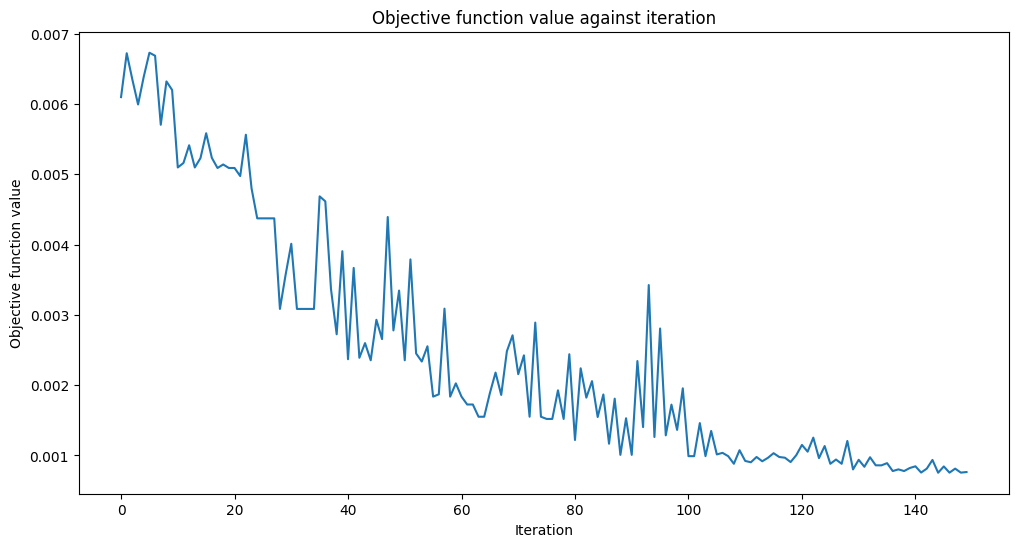

Fit in 19.94 seconds


In [64]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_three_vertical_line_picture_64 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_64,
        train_images=three_vertical_line_picture_64), x0=initial_point_64)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

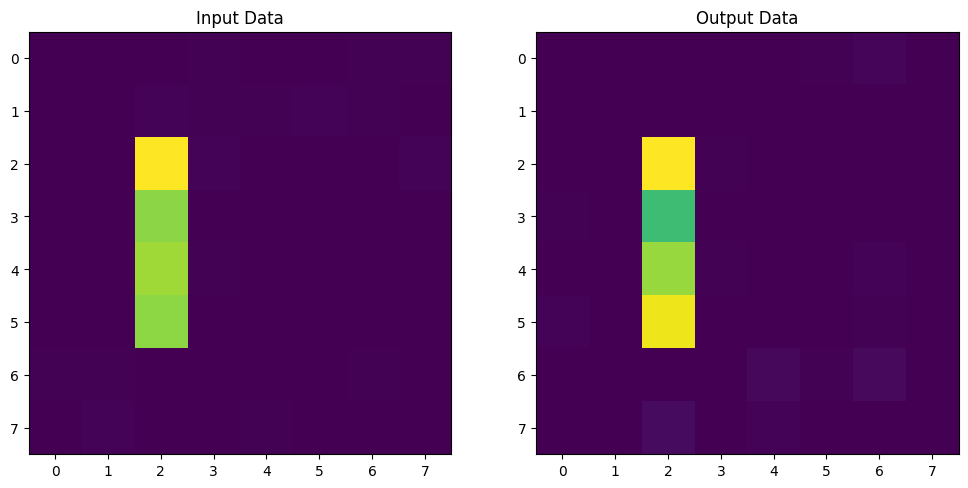

In [81]:
output_images = validate_quantum_autoencoder(
    num_trash, num_latent, [test_three_vertical_line_picture_64],
    fm_64, opt_result_three_vertical_line_picture_64)


predicted = output_images[0]
actual = test_dot_picture_64

mse = mean_squared_error(actual, predicted)
print("MSE:", mse)

### Dot

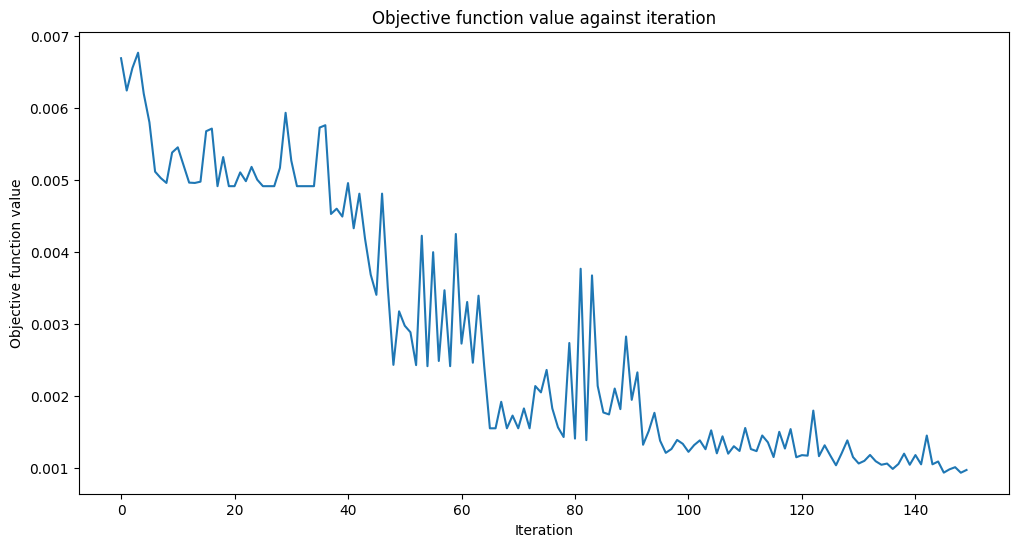

Fit in 20.20 seconds


In [218]:
# opt_result_three_horizontal_picture
opt = COBYLA(maxiter=150)
objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()

opt_result_dot_picture_64 = opt.minimize(
    fun=partial(
        cost_func_digits,
        qnn=qnn_64,
        train_images=dot_picture_64), x0=initial_point_64)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

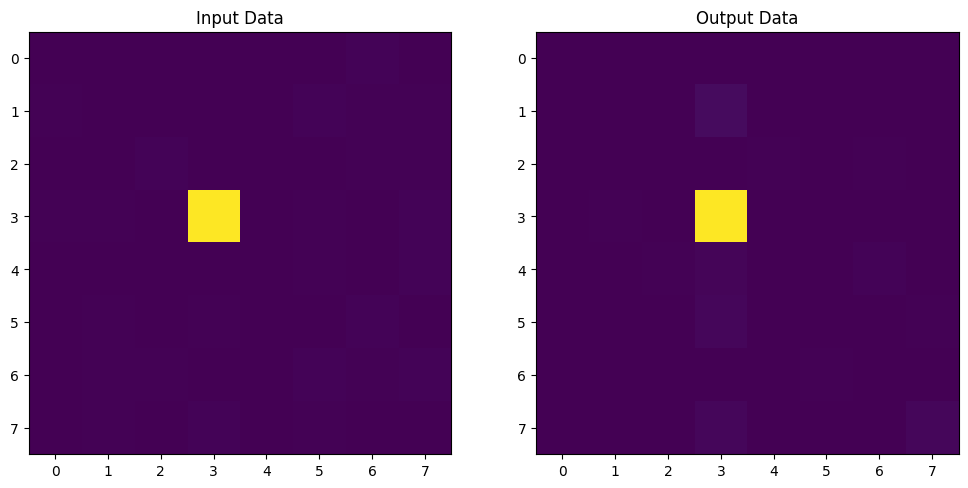

MSE: 0.0024594330819490366


In [222]:
output_images = validate_quantum_autoencoder(
    num_trash, num_latent, [test_dot_picture_64],
    fm_64, opt_result_dot_picture_64)

predicted = output_images[0]
actual = test_dot_picture_64

mse = mean_squared_error(actual, predicted)
print("MSE:", mse)